In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random as rn
from matplotlib.patches import ConnectionPatch
import plotly.graph_objects as go

from scipy import stats
import regex as re


seed = 42

import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

In [2]:
df=pd.read_csv("loan_approval_dataset.csv")
df.head()

loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected

In [3]:
df.isnull().any()

loan_id                      False
 no_of_dependents            False
 education                   False
 self_employed               False
 income_annum                False
 loan_amount                 False
 loan_term                   False
 cibil_score                 False
 residential_assets_value    False
 commercial_assets_value     False
 luxury_assets_value         False
 bank_asset_value            False
 loan_status                 False
dtype: bool

In [4]:
df.columns = df.columns.str.strip()

In [5]:
len(df[df.duplicated()])

0

# EDUCATION

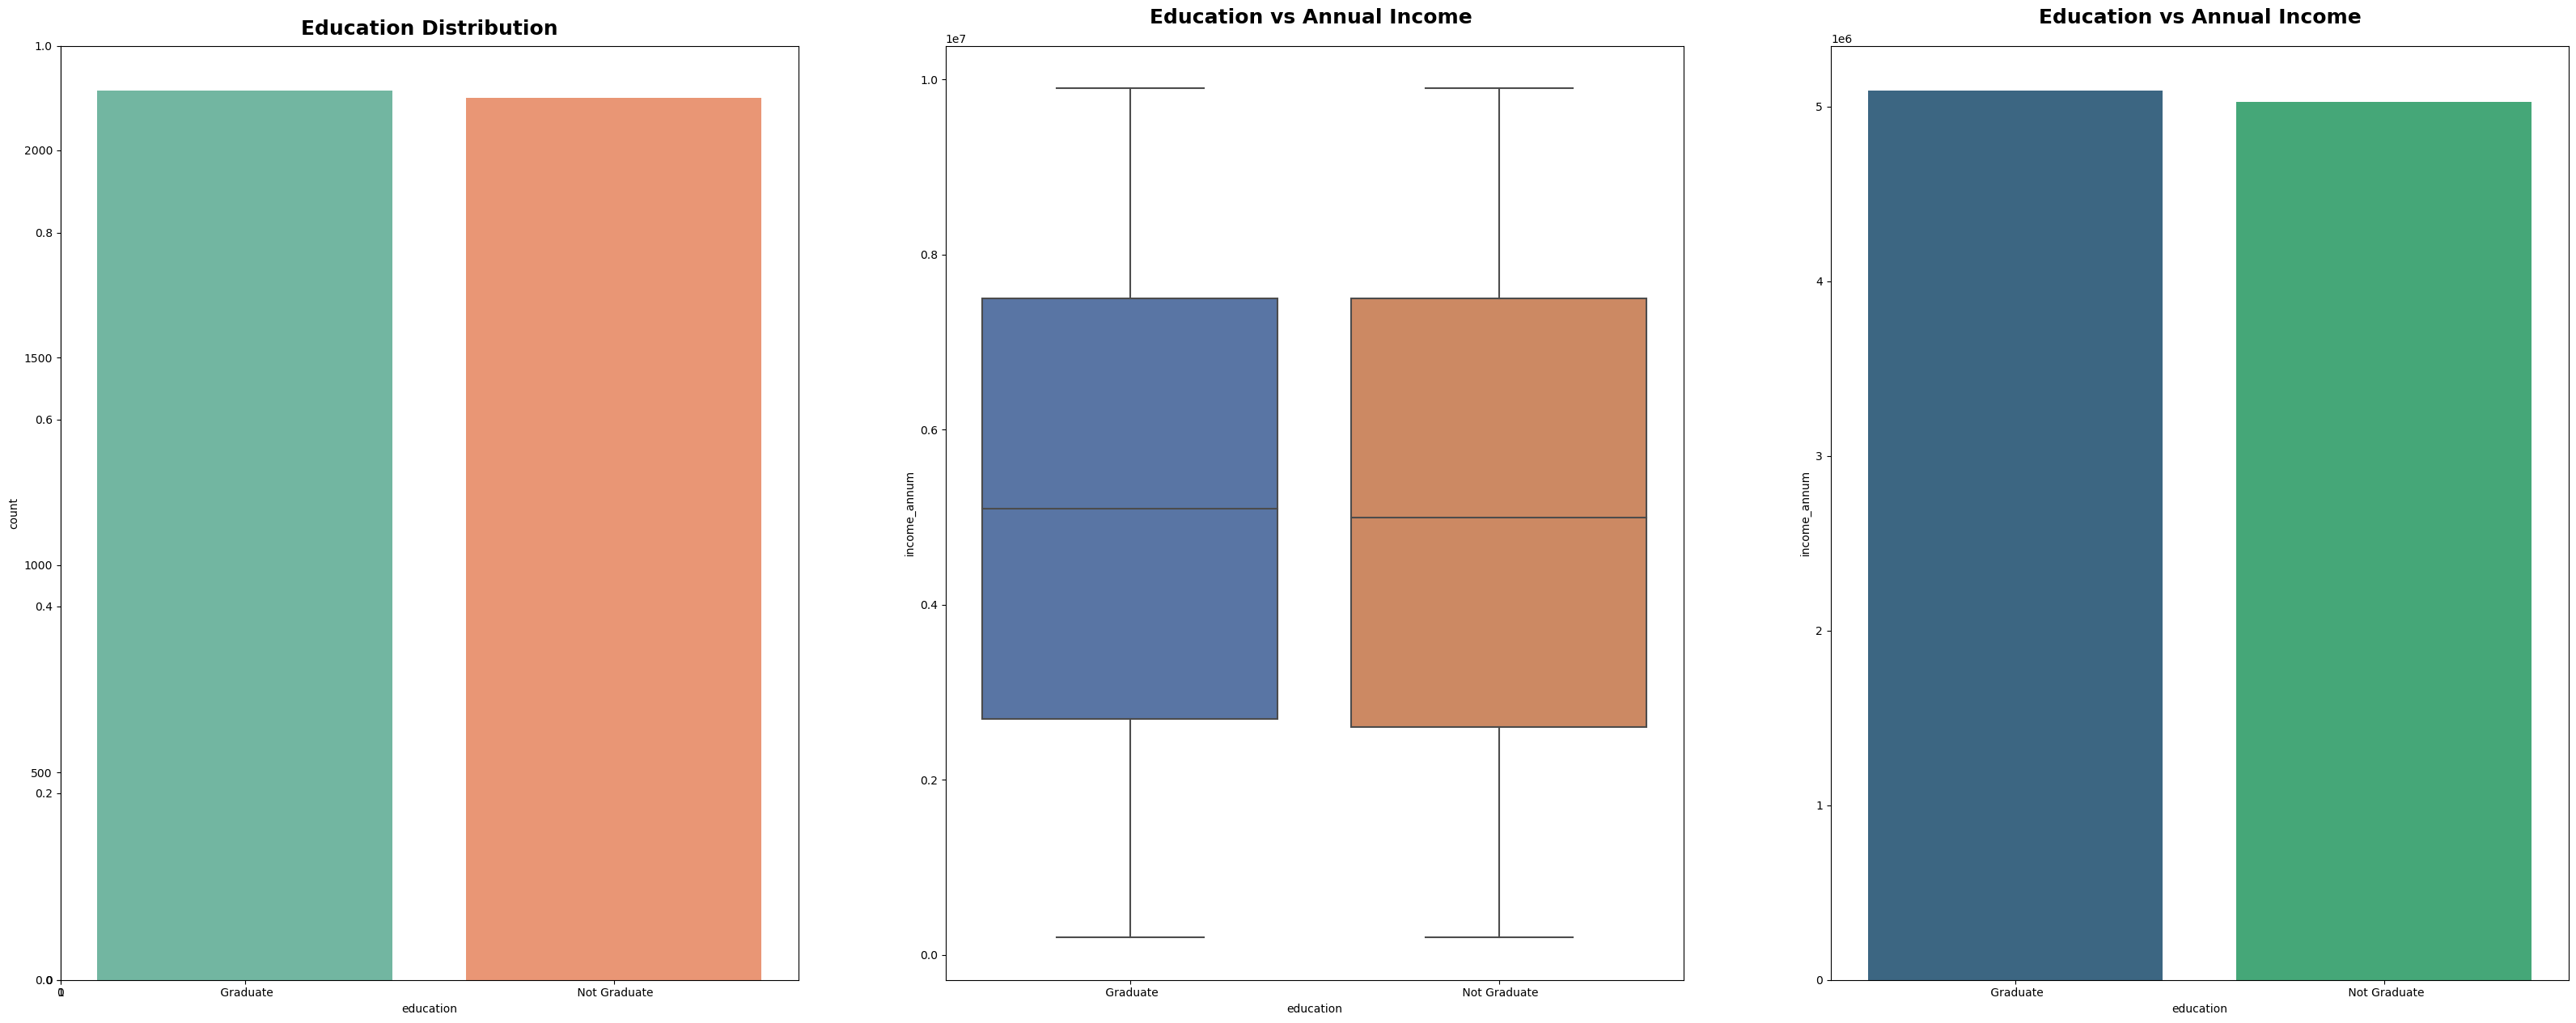

In [6]:
def categorical_visualization(cols):
    
    
    
    plt.subplots (1, 2, gridspec_kw={'width_ratios': [0, 10]}, figsize=(40, 15))
    plt.subplot(1,3,1)
    sns.countplot(x=cols,data=df,palette="Set2",order=df[cols].value_counts().index)
    plt.title(f"{cols.capitalize()} Distribution",pad=10,fontweight="black",fontsize=18)
    plt.xticks(rotation=0)
    
   
    plt.subplot(1,3,2)
    sns.boxplot(x=cols,y="income_annum",data=df,palette="deep")
    plt.title(f"{cols.capitalize()} vs Annual Income ",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=0)

    
    
    plt.subplot(1,3,3)
    x=pd.DataFrame(df.groupby(cols)["income_annum"].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="income_annum",data=x,palette="viridis")
    plt.title(f"{cols.capitalize()} vs Annual Income",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
categorical_visualization("education")

DO THEY REJECT LOANS BASED ON EDUCATION?

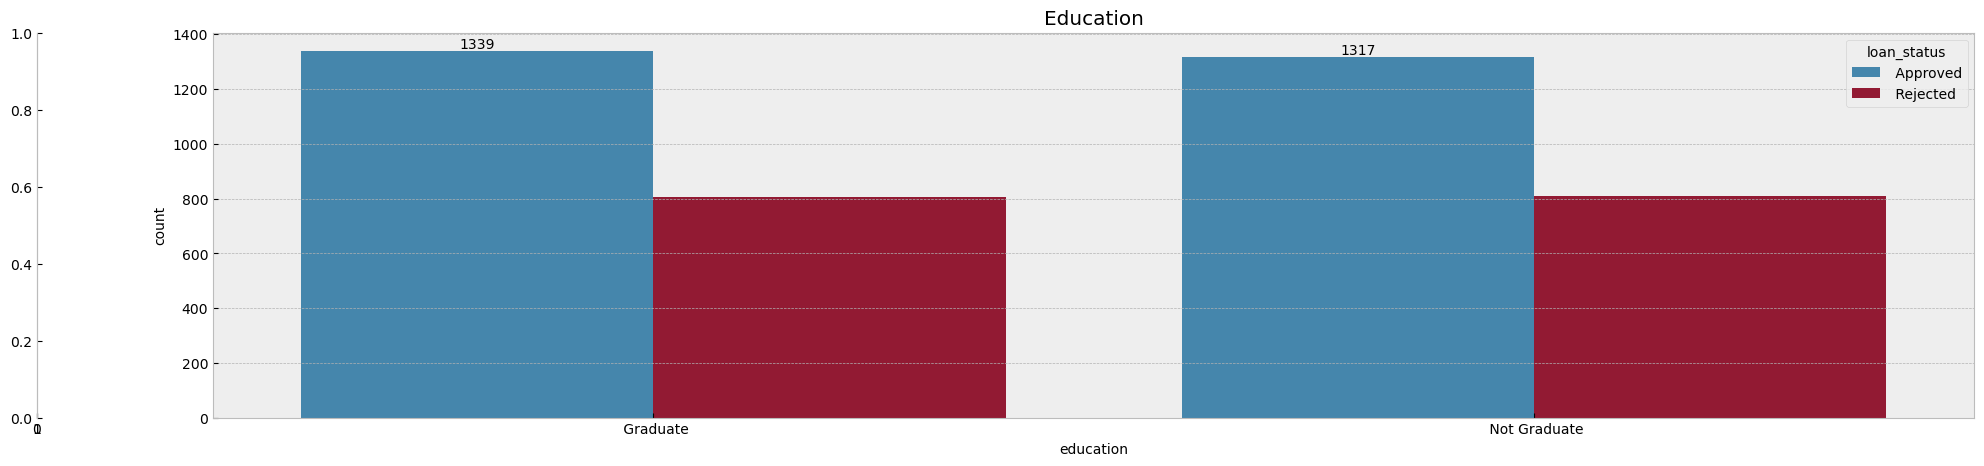

In [7]:
plt.style.use('bmh')
#sns.color_palette("blend:#7AB,#EDA", as_cmap=True)
fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [0, 10]}, figsize=(25, 5))
ax = sns.countplot(x = "education", data = df, order =  df["education"].value_counts().sort_values(ascending=False).index[0:],hue="loan_status")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
ax.bar_label(ax.containers[0])
plt.title(f'Education')
plt.show()
    

NO, LOAN APPROVALS DO NOT DEPEND ON EUCATION

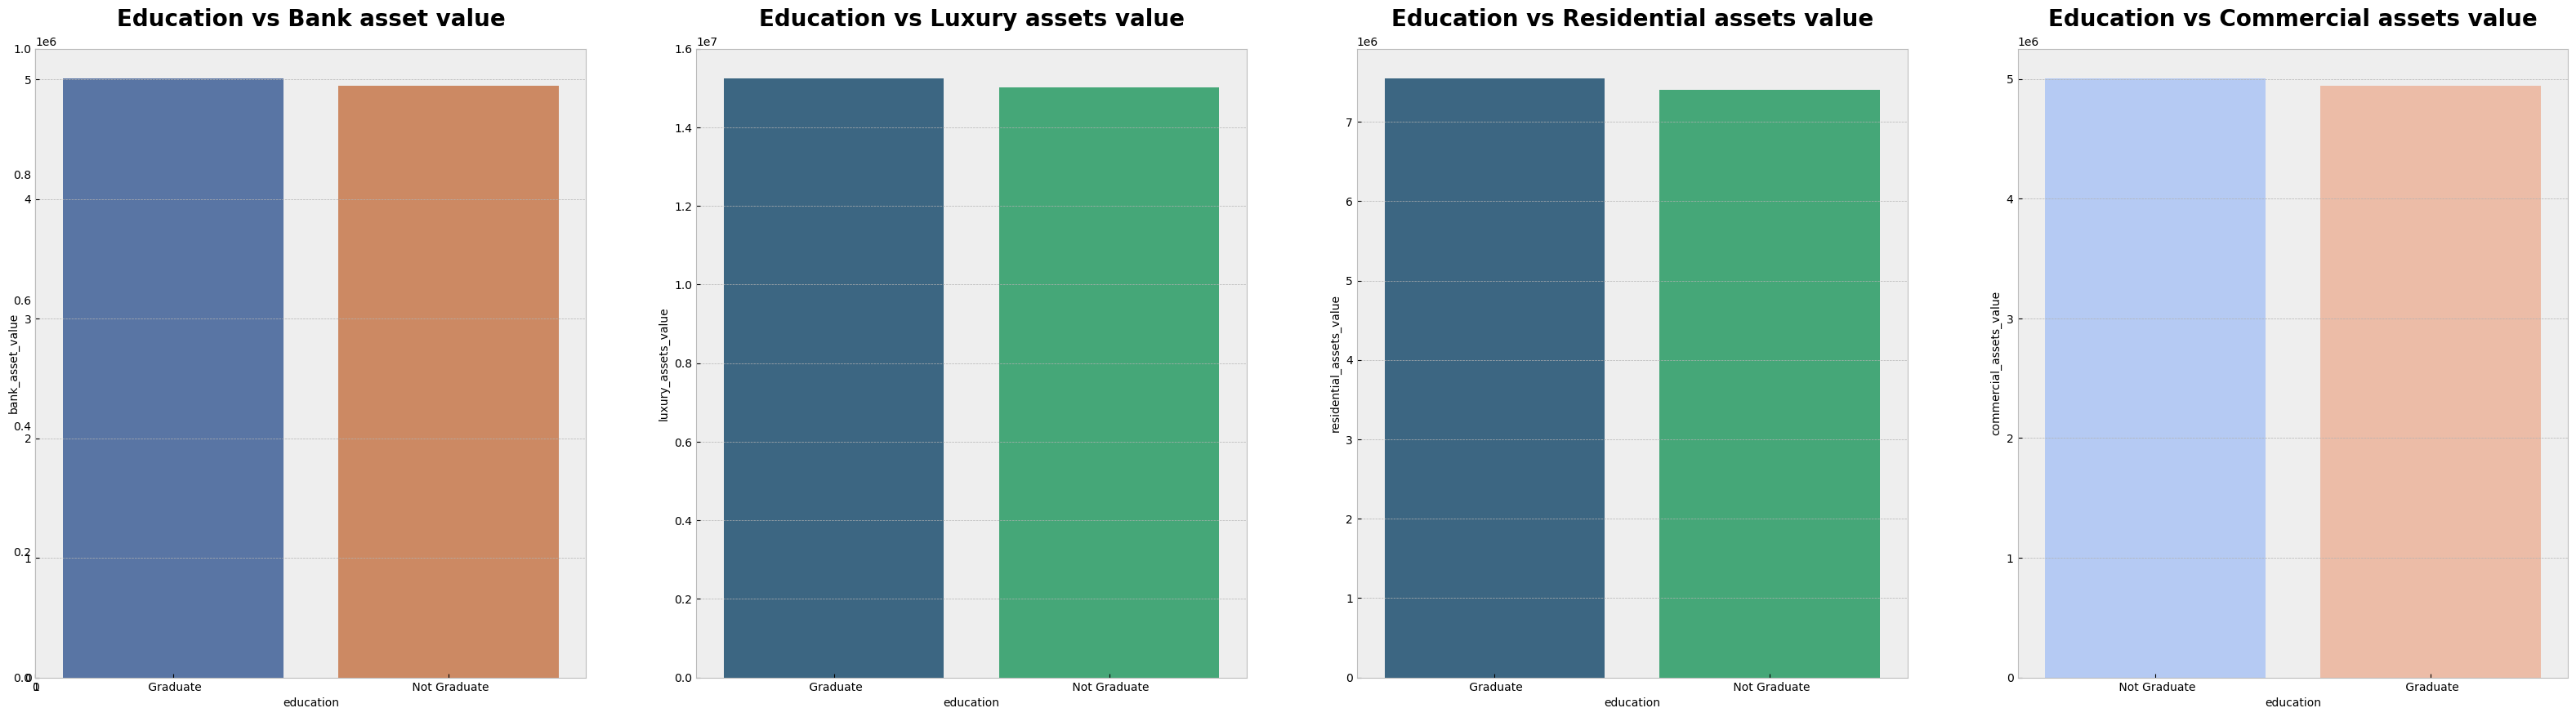

In [8]:
def categorical_visualization(cols):
    
    
    plt.subplots (1, 2, gridspec_kw={'width_ratios': [0, 10]}, figsize=(40, 10))
    plt.subplot(1,4,1)
    x=pd.DataFrame(df.groupby(cols)["bank_asset_value"].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="bank_asset_value",data=x,palette="deep")
    plt.title(f"{cols.capitalize()} vs Bank asset value",pad=20,fontweight="black",fontsize=20)
   
    
    plt.subplot(1,4,2)
    x=pd.DataFrame(df.groupby(cols)["luxury_assets_value"].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="luxury_assets_value",data=x,palette="viridis")
    plt.title(f"{cols.capitalize()} vs Luxury assets value",pad=20,fontweight="black",fontsize=20)
  
    
    plt.subplot(1,4,3)
    x=pd.DataFrame(df.groupby(cols)["residential_assets_value"].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="residential_assets_value",data=x,palette="viridis")
    plt.title(f"{cols.capitalize()} vs Residential assets value",pad=20,fontweight="black",fontsize=20)
    plt.xticks(rotation=0)
    
    
    plt.subplot(1,4,4)
    x=pd.DataFrame(df.groupby(cols)["commercial_assets_value"].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="commercial_assets_value",data=x,palette="coolwarm")
    plt.title(f"{cols.capitalize()} vs Commercial assets value",pad=20,fontweight="black",fontsize=20)
    
   


categorical_visualization("education")

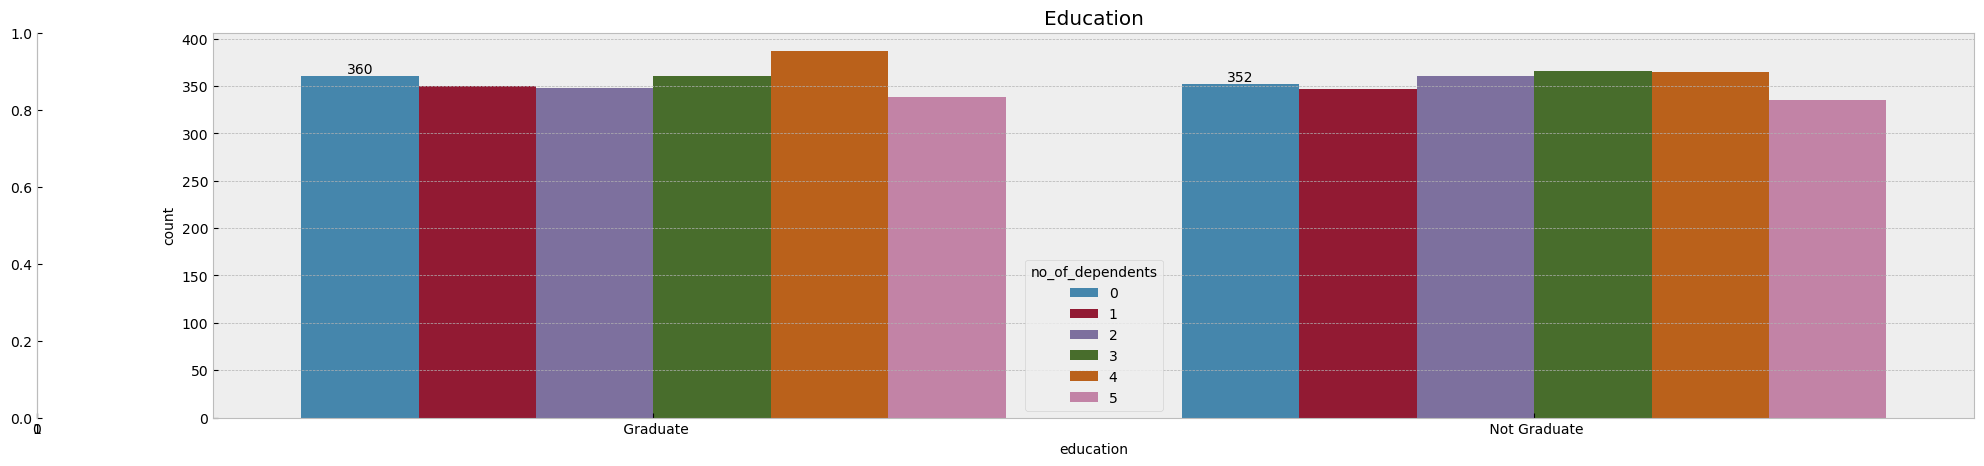

In [9]:
plt.style.use('bmh')
#sns.color_palette("blend:#7AB,#EDA", as_cmap=True)
fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [0, 10]}, figsize=(25, 5))
ax = sns.countplot(x = "education", data = df, order =  df["education"].value_counts().sort_values(ascending=False).index[0:],hue="no_of_dependents")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
ax.bar_label(ax.containers[0])
plt.title(f'Education')
plt.show()
    

# SELF-EMPLOYED

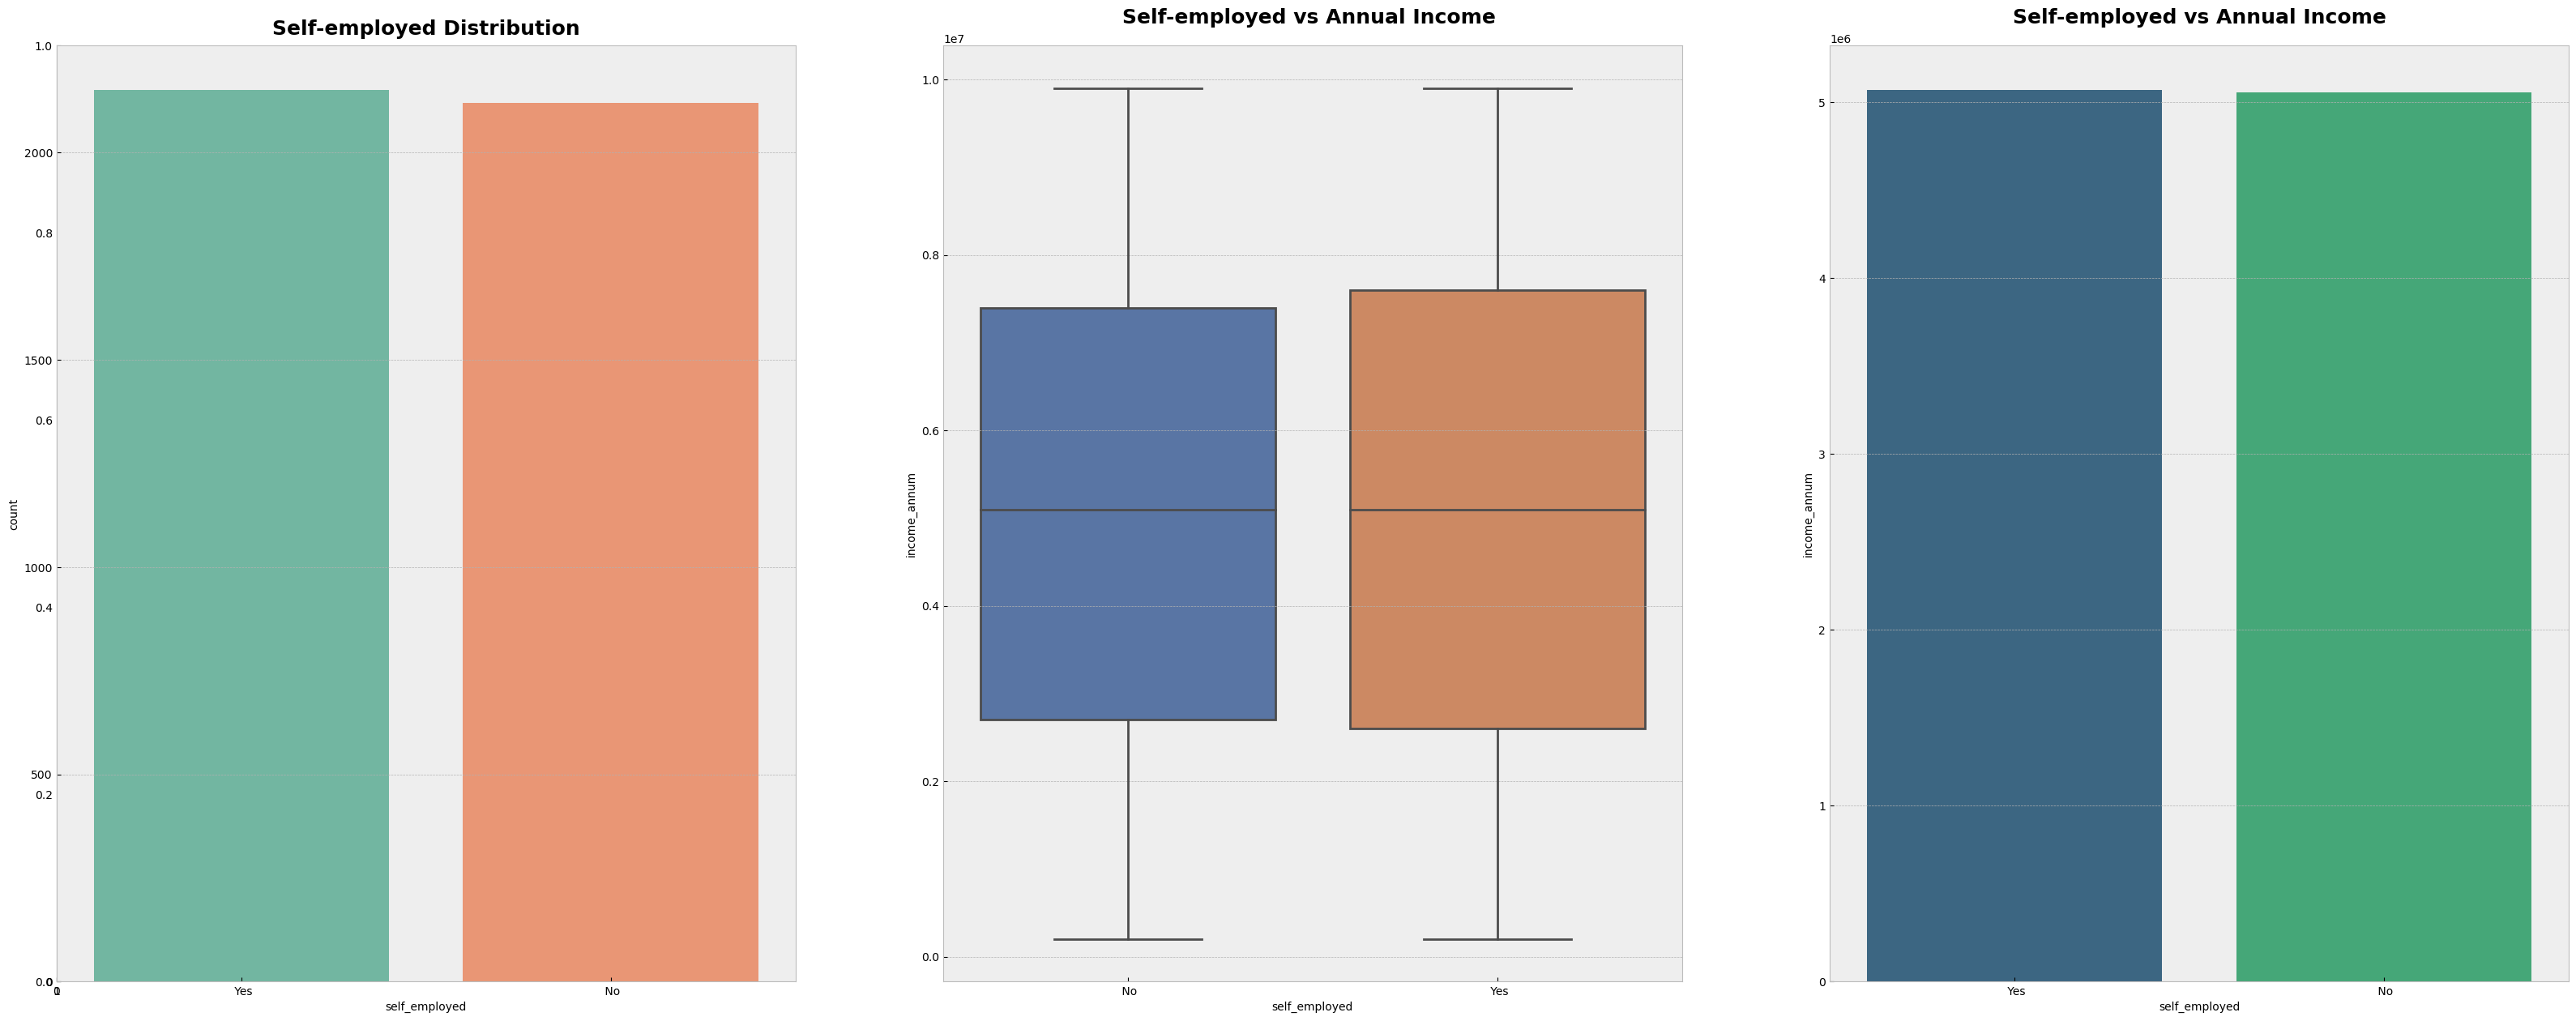

In [10]:
def categorical_visualization(cols):
    
    
    
    plt.subplots (1, 2, gridspec_kw={'width_ratios': [0, 10]}, figsize=(40, 15))
    plt.subplot(1,3,1)
    sns.countplot(x=cols,data=df,palette="Set2",order=df[cols].value_counts().index)
    plt.title(f"{cols.replace('_', '-').capitalize()} Distribution",pad=10,fontweight="black",fontsize=18)
    plt.xticks(rotation=0)
    
   
    plt.subplot(1,3,2)
    sns.boxplot(x=cols,y="income_annum",data=df,palette="deep")
    plt.title(f"{cols.replace('_', '-').capitalize()} vs Annual Income ",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=0)

    
    
    plt.subplot(1,3,3)
    x=pd.DataFrame(df.groupby(cols)["income_annum"].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="income_annum",data=x,palette="viridis")
    plt.title(f"{cols.replace('_', '-').capitalize()} vs Annual Income",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
categorical_visualization("self_employed")

DO THEY REJECT LOANS BASED ON A PERSON BEING SELF EMPLOYED OR NOT?

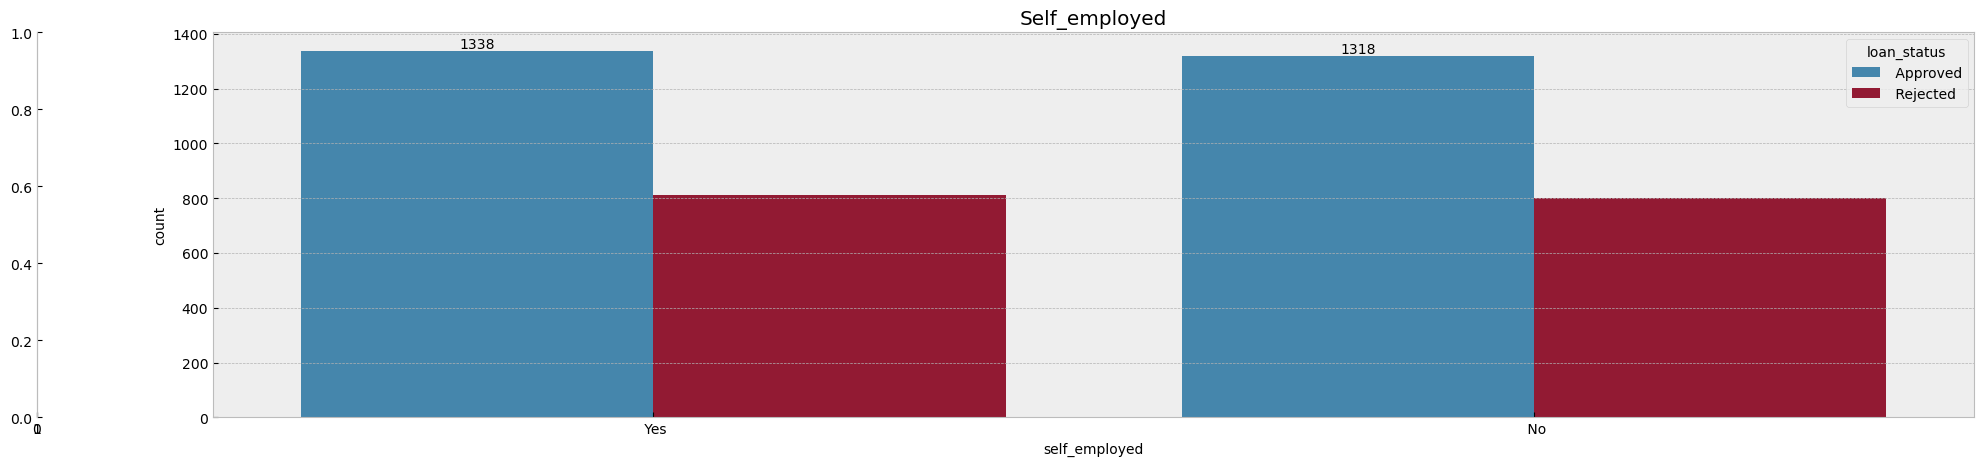

In [11]:
plt.style.use('bmh')
#sns.color_palette("blend:#7AB,#EDA", as_cmap=True)
fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [0, 10]}, figsize=(25, 5))
ax = sns.countplot(x = "self_employed", data = df, order =  df["self_employed"].value_counts().sort_values(ascending=False).index[0:],hue="loan_status")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
ax.bar_label(ax.containers[0])
plt.title(f'Self_employed')
plt.show()
    

No , it's not a facor

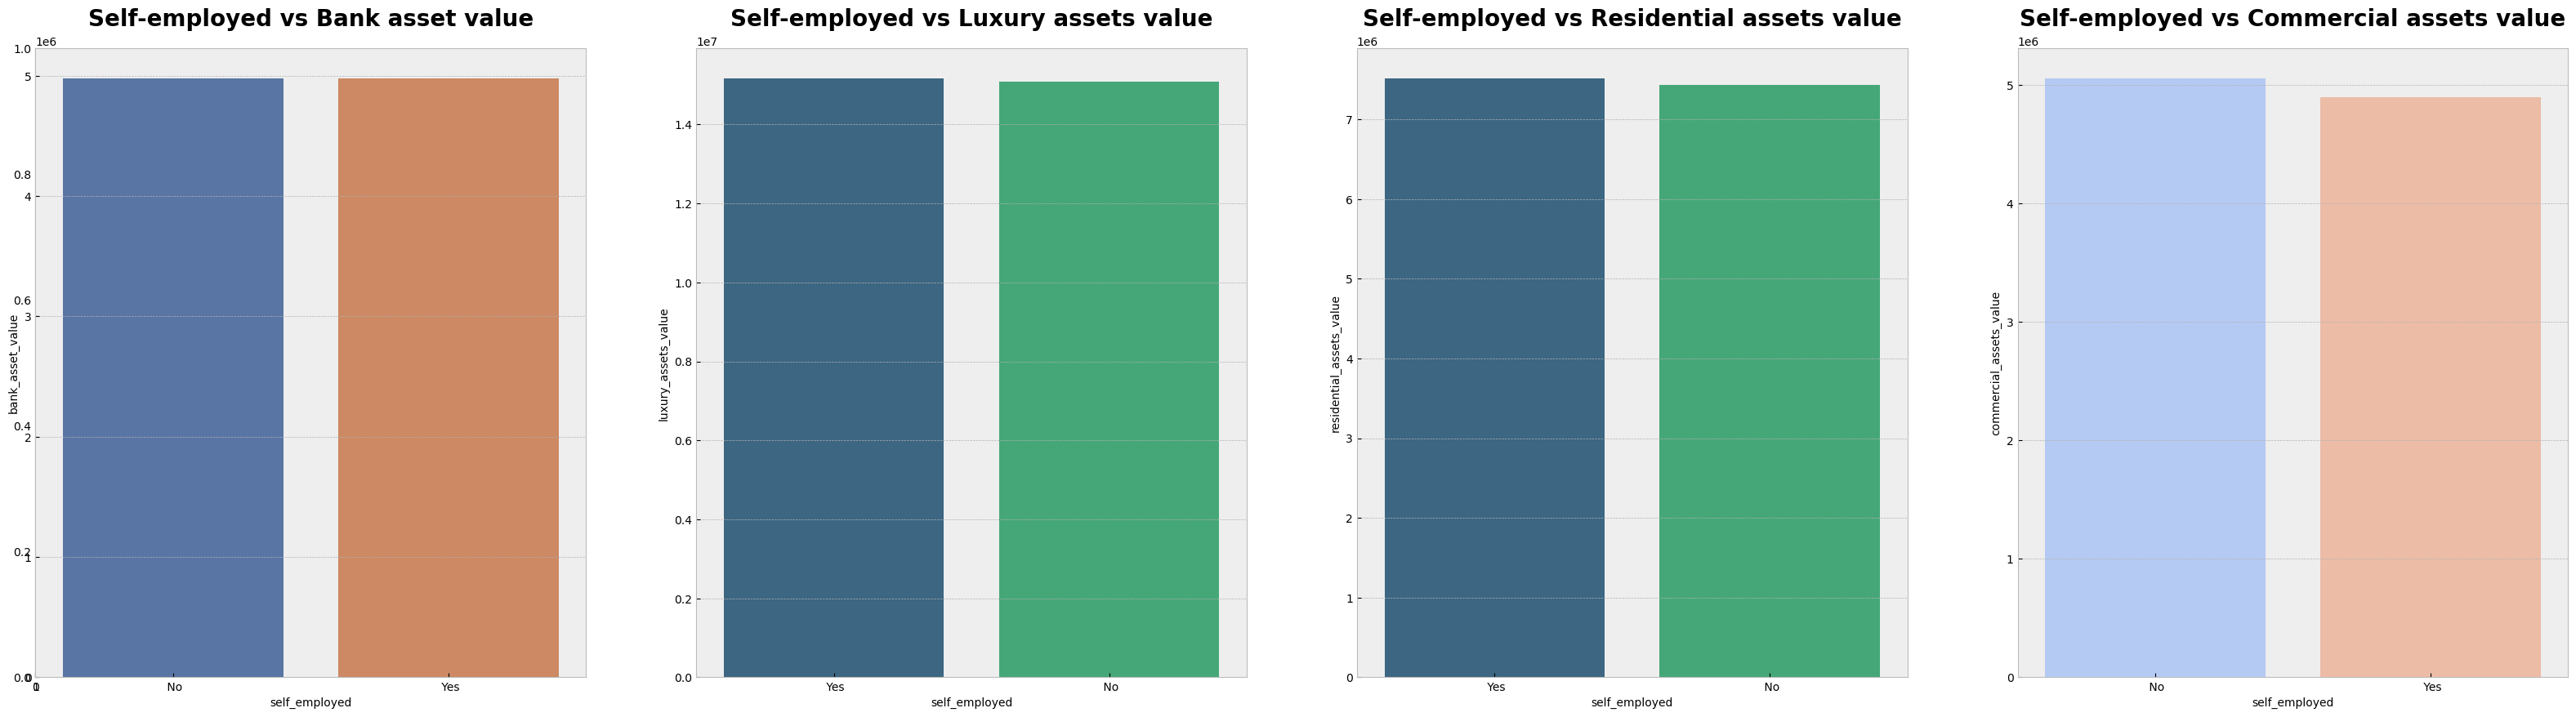

In [12]:
def categorical_visualization(cols):
    
    
    plt.subplots (1, 2, gridspec_kw={'width_ratios': [0, 10]}, figsize=(40, 10))
    plt.subplot(1,4,1)
    x=pd.DataFrame(df.groupby(cols)["bank_asset_value"].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="bank_asset_value",data=x,palette="deep")
    plt.title(f"{cols.replace('_', '-').capitalize()} vs Bank asset value",pad=20,fontweight="black",fontsize=20)
   
    
    plt.subplot(1,4,2)
    x=pd.DataFrame(df.groupby(cols)["luxury_assets_value"].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="luxury_assets_value",data=x,palette="viridis")
    plt.title(f"{cols.replace('_', '-').capitalize()} vs Luxury assets value",pad=20,fontweight="black",fontsize=20)
  
    
    plt.subplot(1,4,3)
    x=pd.DataFrame(df.groupby(cols)["residential_assets_value"].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="residential_assets_value",data=x,palette="viridis")
    plt.title(f"{cols.replace('_', '-').capitalize()} vs Residential assets value",pad=20,fontweight="black",fontsize=20)
    plt.xticks(rotation=0)
    
    
    plt.subplot(1,4,4)
    x=pd.DataFrame(df.groupby(cols)["commercial_assets_value"].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="commercial_assets_value",data=x,palette="coolwarm")
    plt.title(f"{cols.replace('_', '-').capitalize()} vs Commercial assets value",pad=20,fontweight="black",fontsize=20)
    
   


categorical_visualization("self_employed")

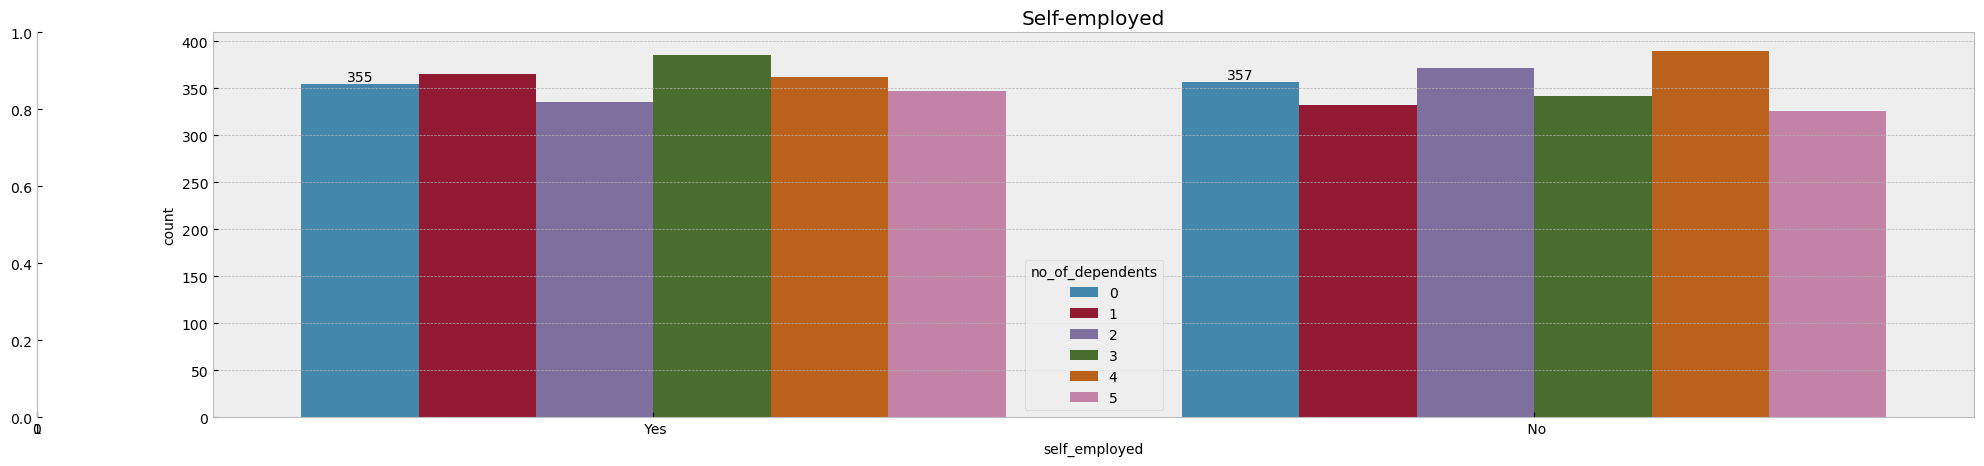

In [13]:
plt.style.use('bmh')
#sns.color_palette("blend:#7AB,#EDA", as_cmap=True)
fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [0, 10]}, figsize=(25, 5))
ax = sns.countplot(x = "self_employed", data = df, order =  df["self_employed"].value_counts().sort_values(ascending=False).index[0:],hue="no_of_dependents")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
ax.bar_label(ax.containers[0])
plt.title(f'Self-employed')
plt.show()
    

# HOW DOES cibil_score AFFECT LOAN APPRIVALS?

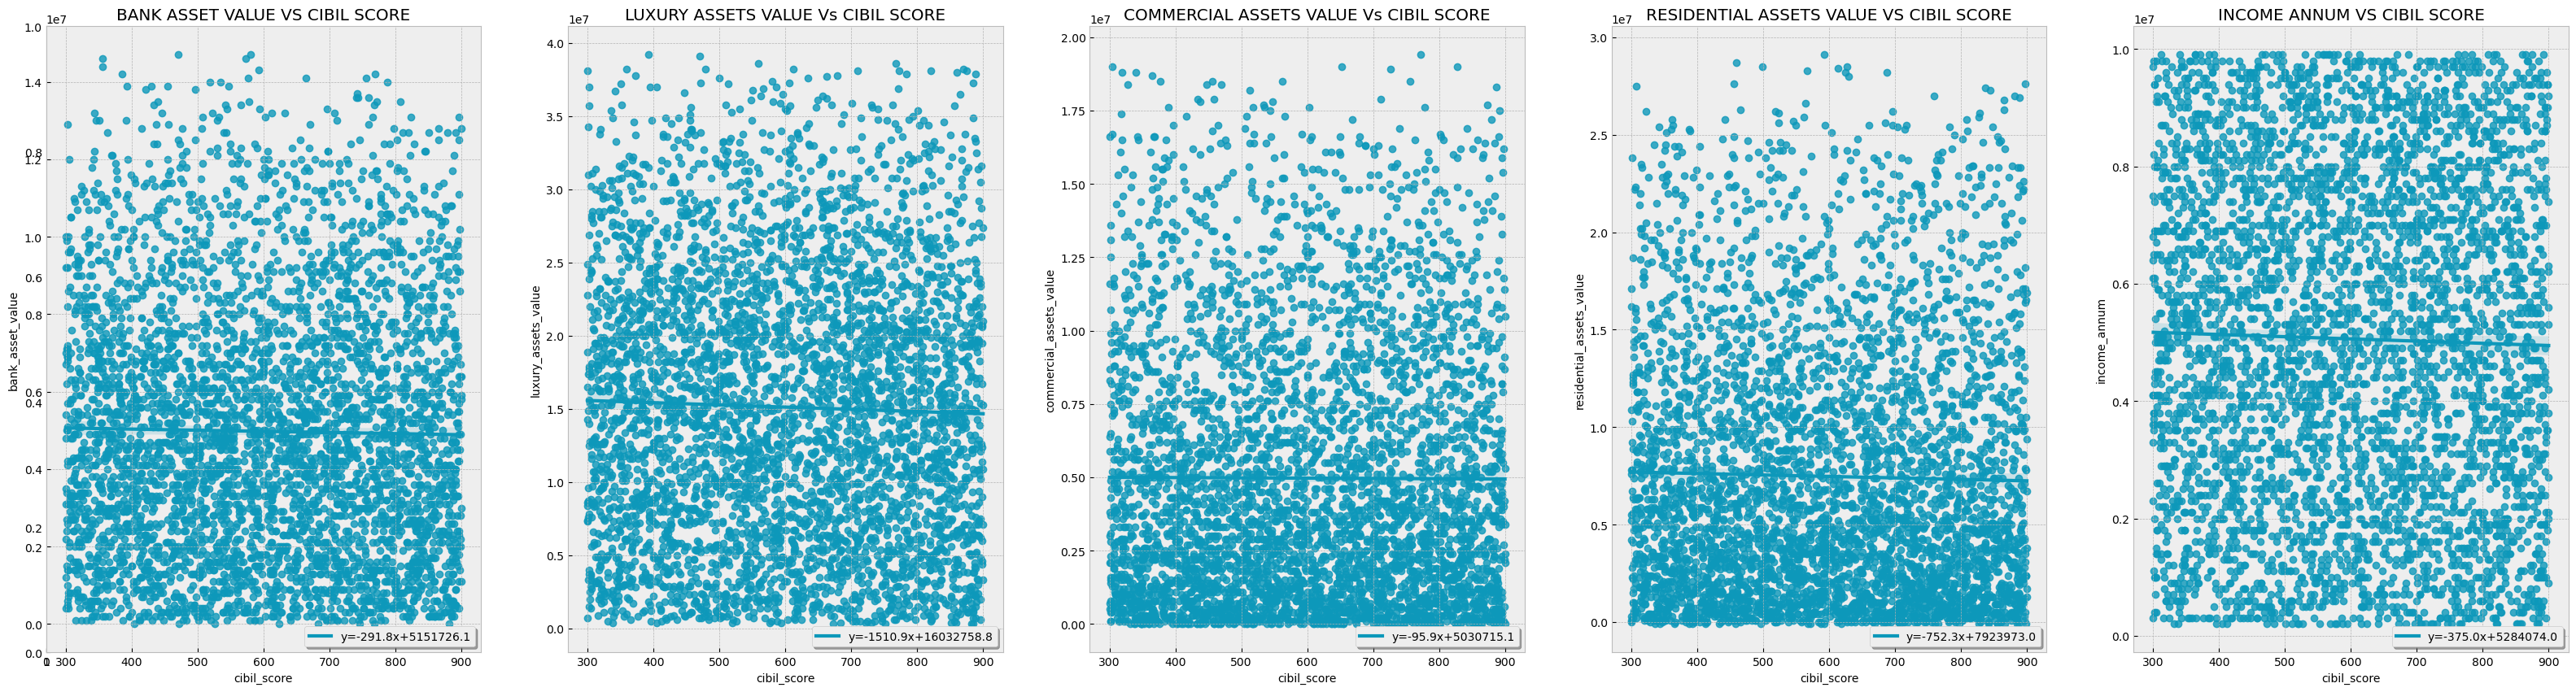

In [14]:
def lr_plot(df, col_x, leg):
    
    plt.subplots (1, 2, gridspec_kw={'width_ratios': [0, 10]}, figsize=(40, 10))
    plt.subplot(1,5,1)
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[col_x],df['bank_asset_value'])
    sns.regplot(x = col_x, y = 'bank_asset_value', data = df, color='#0d98ba', line_kws = {'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
    plt.legend(loc = leg, ncol = 1, fancybox = True, shadow = True, frameon = True)
    plt.title("bank_asset_value".replace('_', ' ').upper() + ' VS ' + col_x.replace('_', ' ').upper())
    #plt.show()
    
    plt.subplot(1,5,2)
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[col_x],df["luxury_assets_value"])
    sns.regplot(x = col_x, y = "luxury_assets_value", data = df, color='#0d98ba', line_kws = {'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
    plt.legend(loc = leg, ncol = 1, fancybox = True, shadow = True, frameon = True)
    plt.title("luxury_assets_value".replace('_', ' ').upper() + ' Vs ' + col_x.replace('_', ' ').upper())
    #plt.show()
    
    plt.subplot(1,5,3)
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[col_x],df["commercial_assets_value"])
    sns.regplot(x = col_x, y = "commercial_assets_value", data = df, color='#0d98ba', line_kws = {'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
    plt.legend(loc = leg, ncol = 1, fancybox = True, shadow = True, frameon = True)
    plt.title("commercial_assets_value".replace('_', ' ').upper() + ' Vs ' + col_x.replace('_', ' ').upper())
    #plt.show()
     
    plt.subplot(1,5,4)    
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[col_x],df["residential_assets_value"])
    sns.regplot(x = col_x, y = "residential_assets_value", data = df, color='#0d98ba', line_kws = {'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
    plt.legend(loc = leg, ncol = 1, fancybox = True, shadow = True, frameon = True)
    plt.title("residential_assets_value".replace('_', ' ').upper() + ' VS ' + col_x.replace('_', ' ').upper())
    #plt.show()
    
    plt.subplot(1,5,5)    
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[col_x],df["income_annum"])
    sns.regplot(x = col_x, y = "income_annum", data = df, color='#0d98ba', line_kws = {'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
    plt.legend(loc = leg, ncol = 1, fancybox = True, shadow = True, frameon = True)
    plt.title("income_annum".replace('_', ' ').upper() + ' VS ' + col_x.replace('_', ' ').upper())
    plt.show()

   

lr_plot(df,'cibil_score', 'lower right')

There ae no correlation between CIBIL SCORE AND THE NUMERICAL COLUMNS

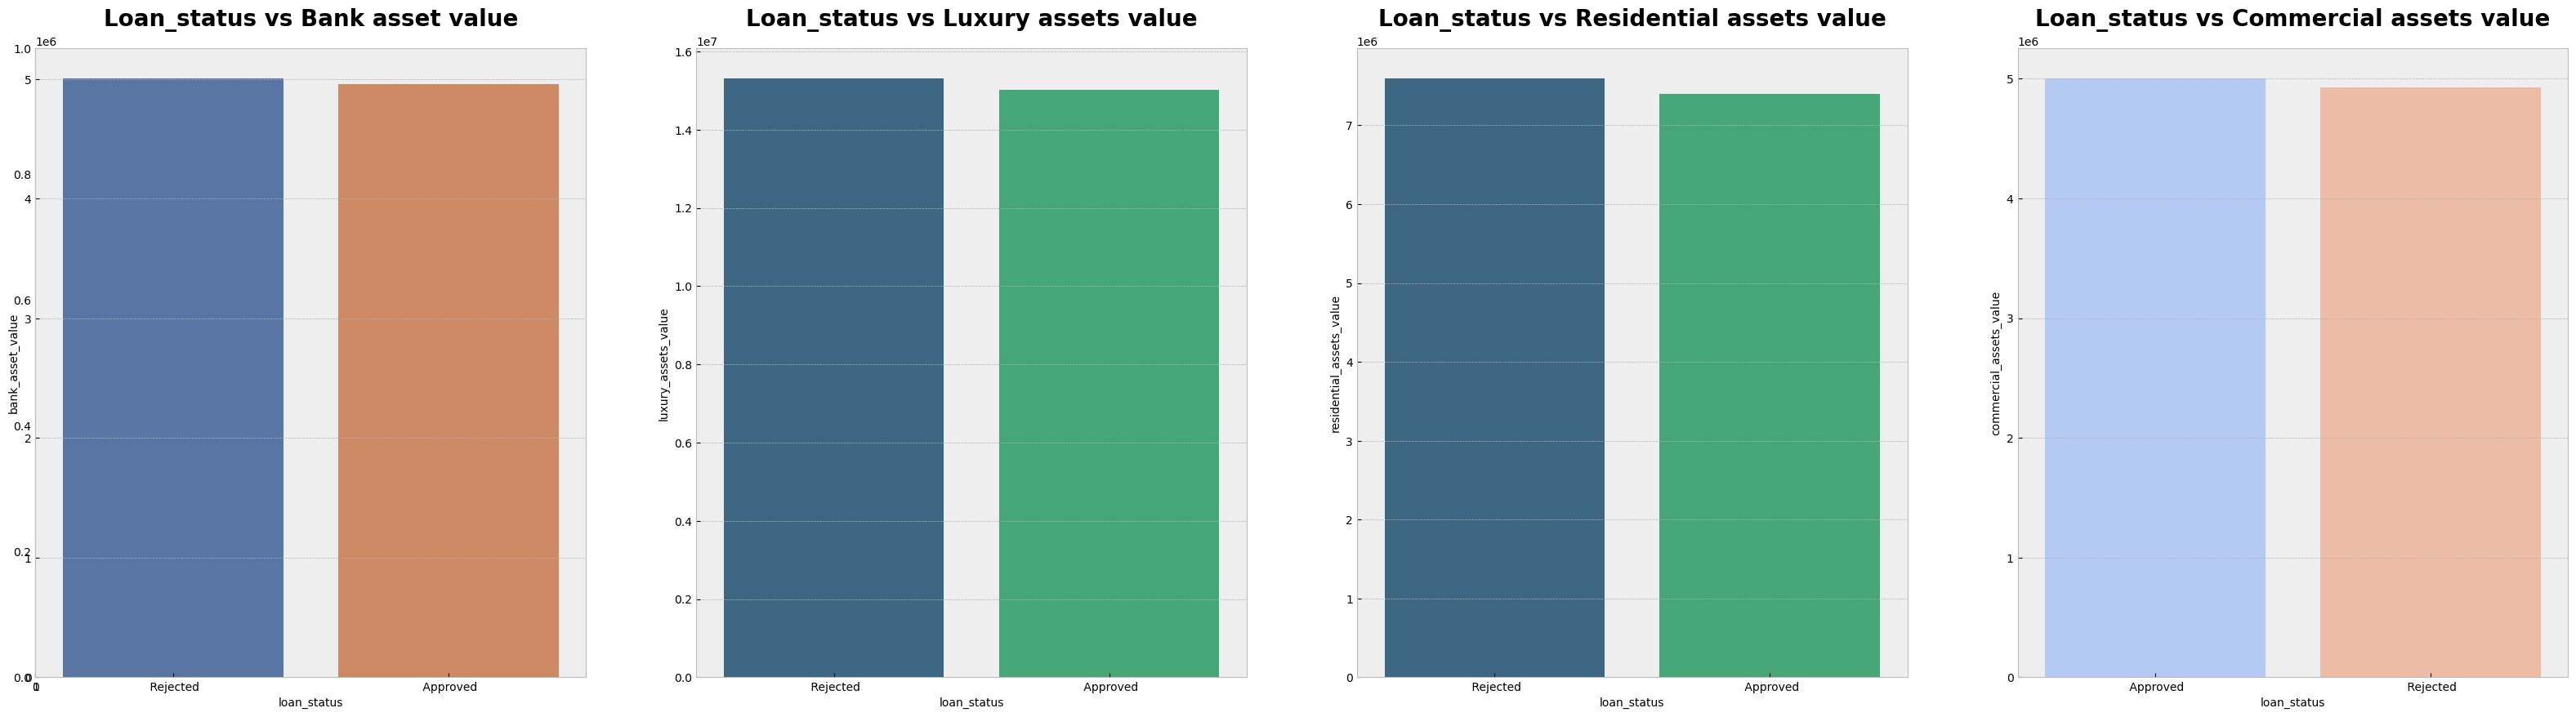

In [15]:
def categorical_visualization(cols):
    
    
    plt.subplots (1, 2, gridspec_kw={'width_ratios': [0, 10]}, figsize=(40, 10))
    plt.subplot(1,4,1)
    x=pd.DataFrame(df.groupby(cols)["bank_asset_value"].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="bank_asset_value",data=x,palette="deep")
    plt.title(f"{cols.capitalize()} vs Bank asset value",pad=20,fontweight="black",fontsize=20)
   
    
    plt.subplot(1,4,2)
    x=pd.DataFrame(df.groupby(cols)["luxury_assets_value"].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="luxury_assets_value",data=x,palette="viridis")
    plt.title(f"{cols.capitalize()} vs Luxury assets value",pad=20,fontweight="black",fontsize=20)
  
    
    plt.subplot(1,4,3)
    x=pd.DataFrame(df.groupby(cols)["residential_assets_value"].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="residential_assets_value",data=x,palette="viridis")
    plt.title(f"{cols.capitalize()} vs Residential assets value",pad=20,fontweight="black",fontsize=20)
    plt.xticks(rotation=0)
    
    
    plt.subplot(1,4,4)
    x=pd.DataFrame(df.groupby(cols)["commercial_assets_value"].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="commercial_assets_value",data=x,palette="coolwarm")
    plt.title(f"{cols.capitalize()} vs Commercial assets value",pad=20,fontweight="black",fontsize=20)
    
   


categorical_visualization("loan_status")

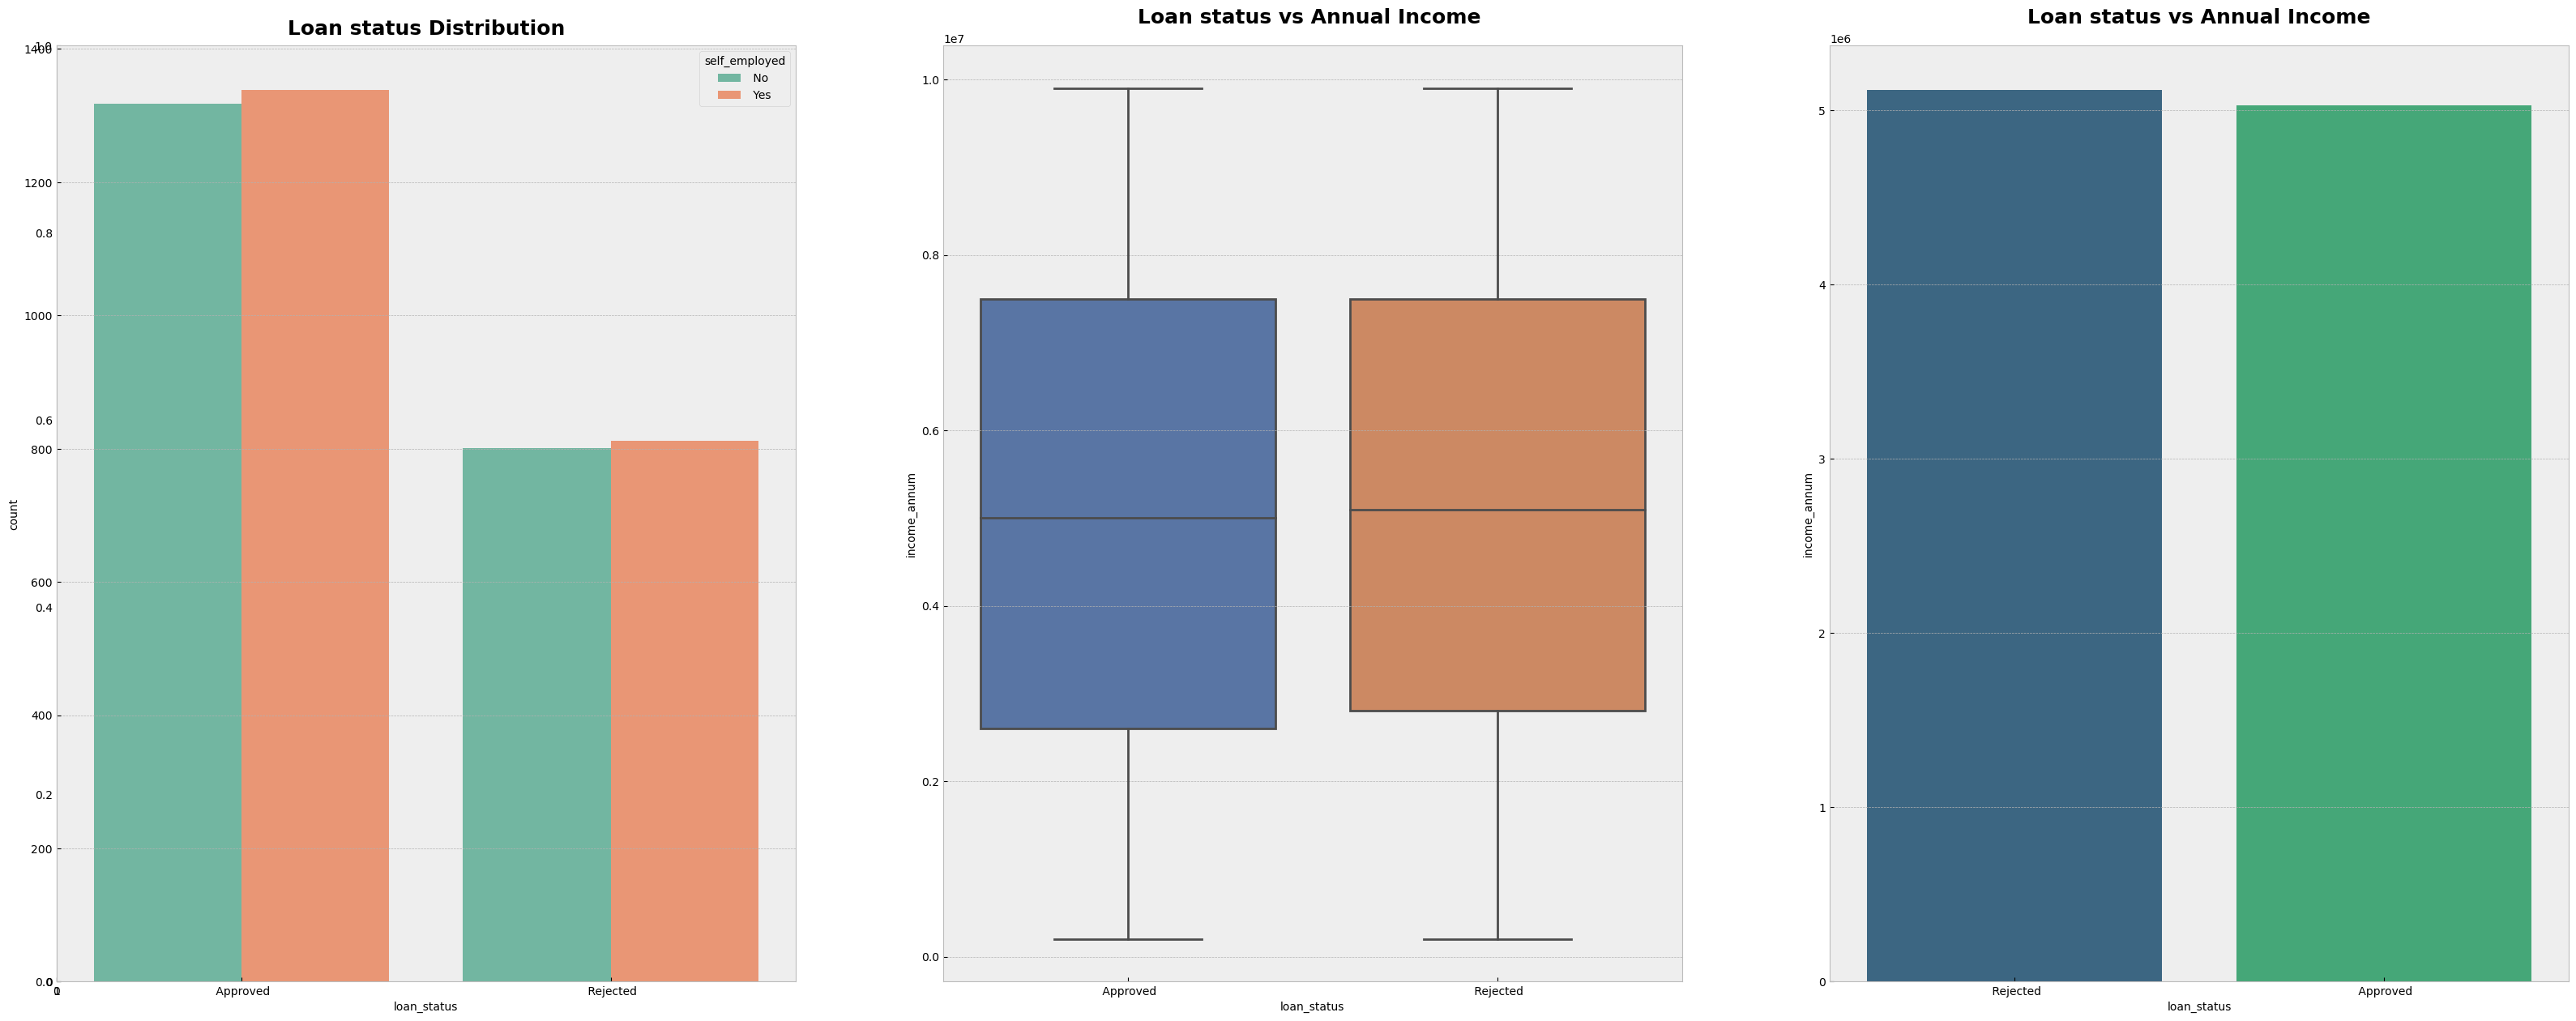

In [16]:
def categorical_visualization(cols):
    
    
    
    plt.subplots (1, 2, gridspec_kw={'width_ratios': [0, 10]}, figsize=(40, 15))
    plt.subplot(1,3,1)
    sns.countplot(x=cols,data=df,palette="Set2",order=df[cols].value_counts().index,hue="self_employed")
    plt.title(f"{cols.replace('_', ' ').capitalize()} Distribution",pad=10,fontweight="black",fontsize=18)
    plt.xticks(rotation=0)
    
   
    plt.subplot(1,3,2)
    sns.boxplot(x=cols,y="income_annum",data=df,palette="deep")
    plt.title(f"{cols.replace('_', ' ').capitalize()} vs Annual Income ",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=0)

    
    
    plt.subplot(1,3,3)
    x=pd.DataFrame(df.groupby(cols)["income_annum"].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="income_annum",data=x,palette="viridis")
    plt.title(f"{cols.replace('_', ' ').capitalize()} vs Annual Income",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
categorical_visualization("loan_status")

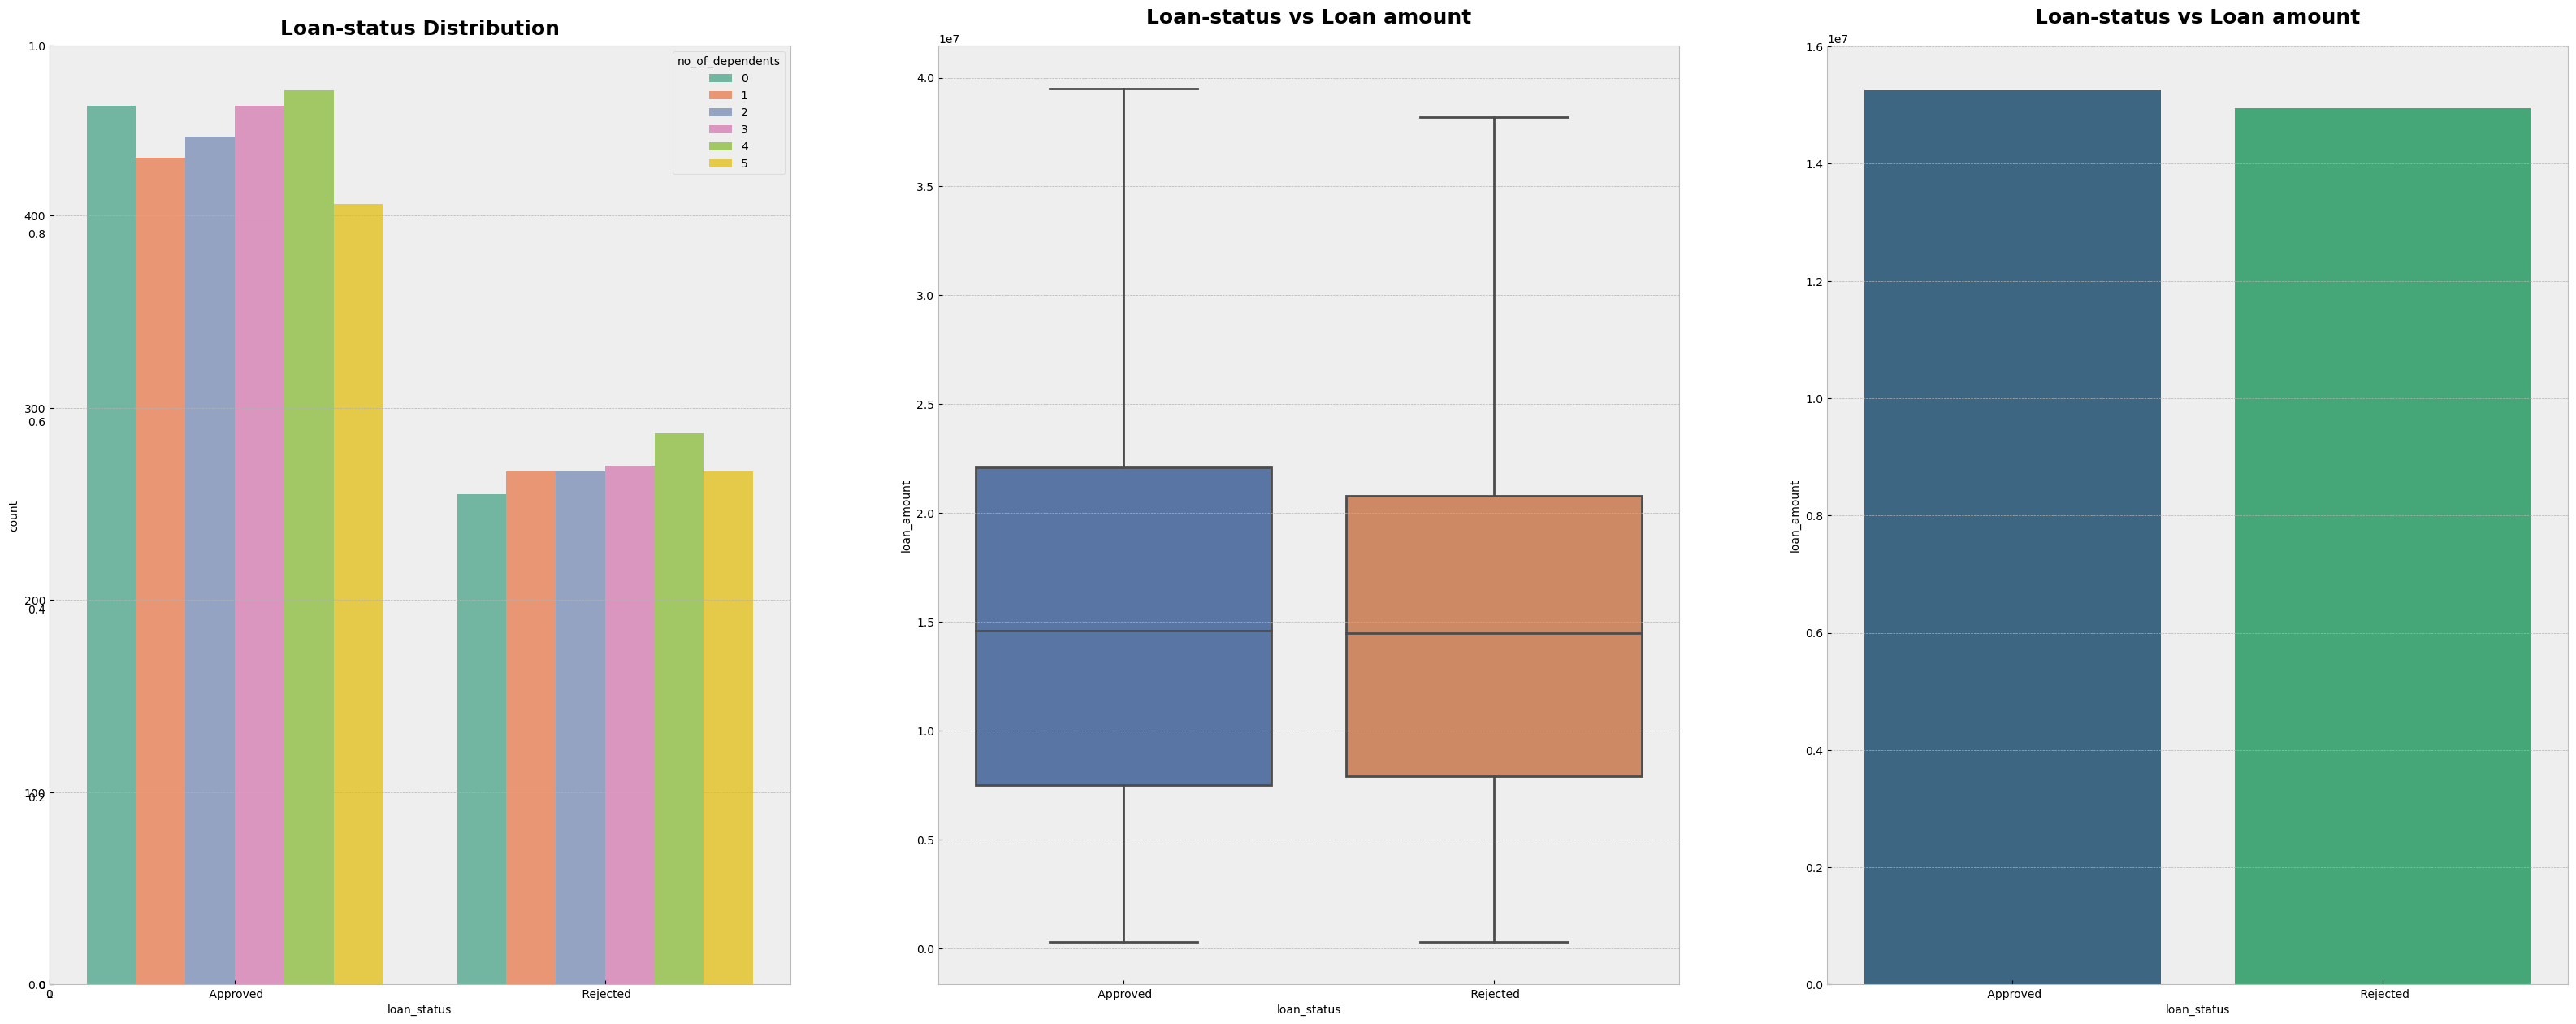

In [17]:
def categorical_visualization(cols):
    
    
    
    plt.subplots (1, 2, gridspec_kw={'width_ratios': [0, 10]}, figsize=(40, 15))
    plt.subplot(1,3,1)
    sns.countplot(x=cols,data=df,palette="Set2",order=df[cols].value_counts().index,hue="no_of_dependents")
    plt.title(f"{cols.replace('_', '-').capitalize()} Distribution",pad=10,fontweight="black",fontsize=18)
    plt.xticks(rotation=0)
    
   
    plt.subplot(1,3,2)
    sns.boxplot(x=cols,y="loan_amount",data=df,palette="deep")
    plt.title(f"{cols.replace('_', '-').capitalize()} vs Loan amount",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=0)

    
    
    plt.subplot(1,3,3)
    x=pd.DataFrame(df.groupby(cols)["loan_amount"].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="loan_amount",data=x,palette="viridis")
    plt.title(f"{cols.replace('_', '-').capitalize()} vs Loan amount",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
categorical_visualization("loan_status")

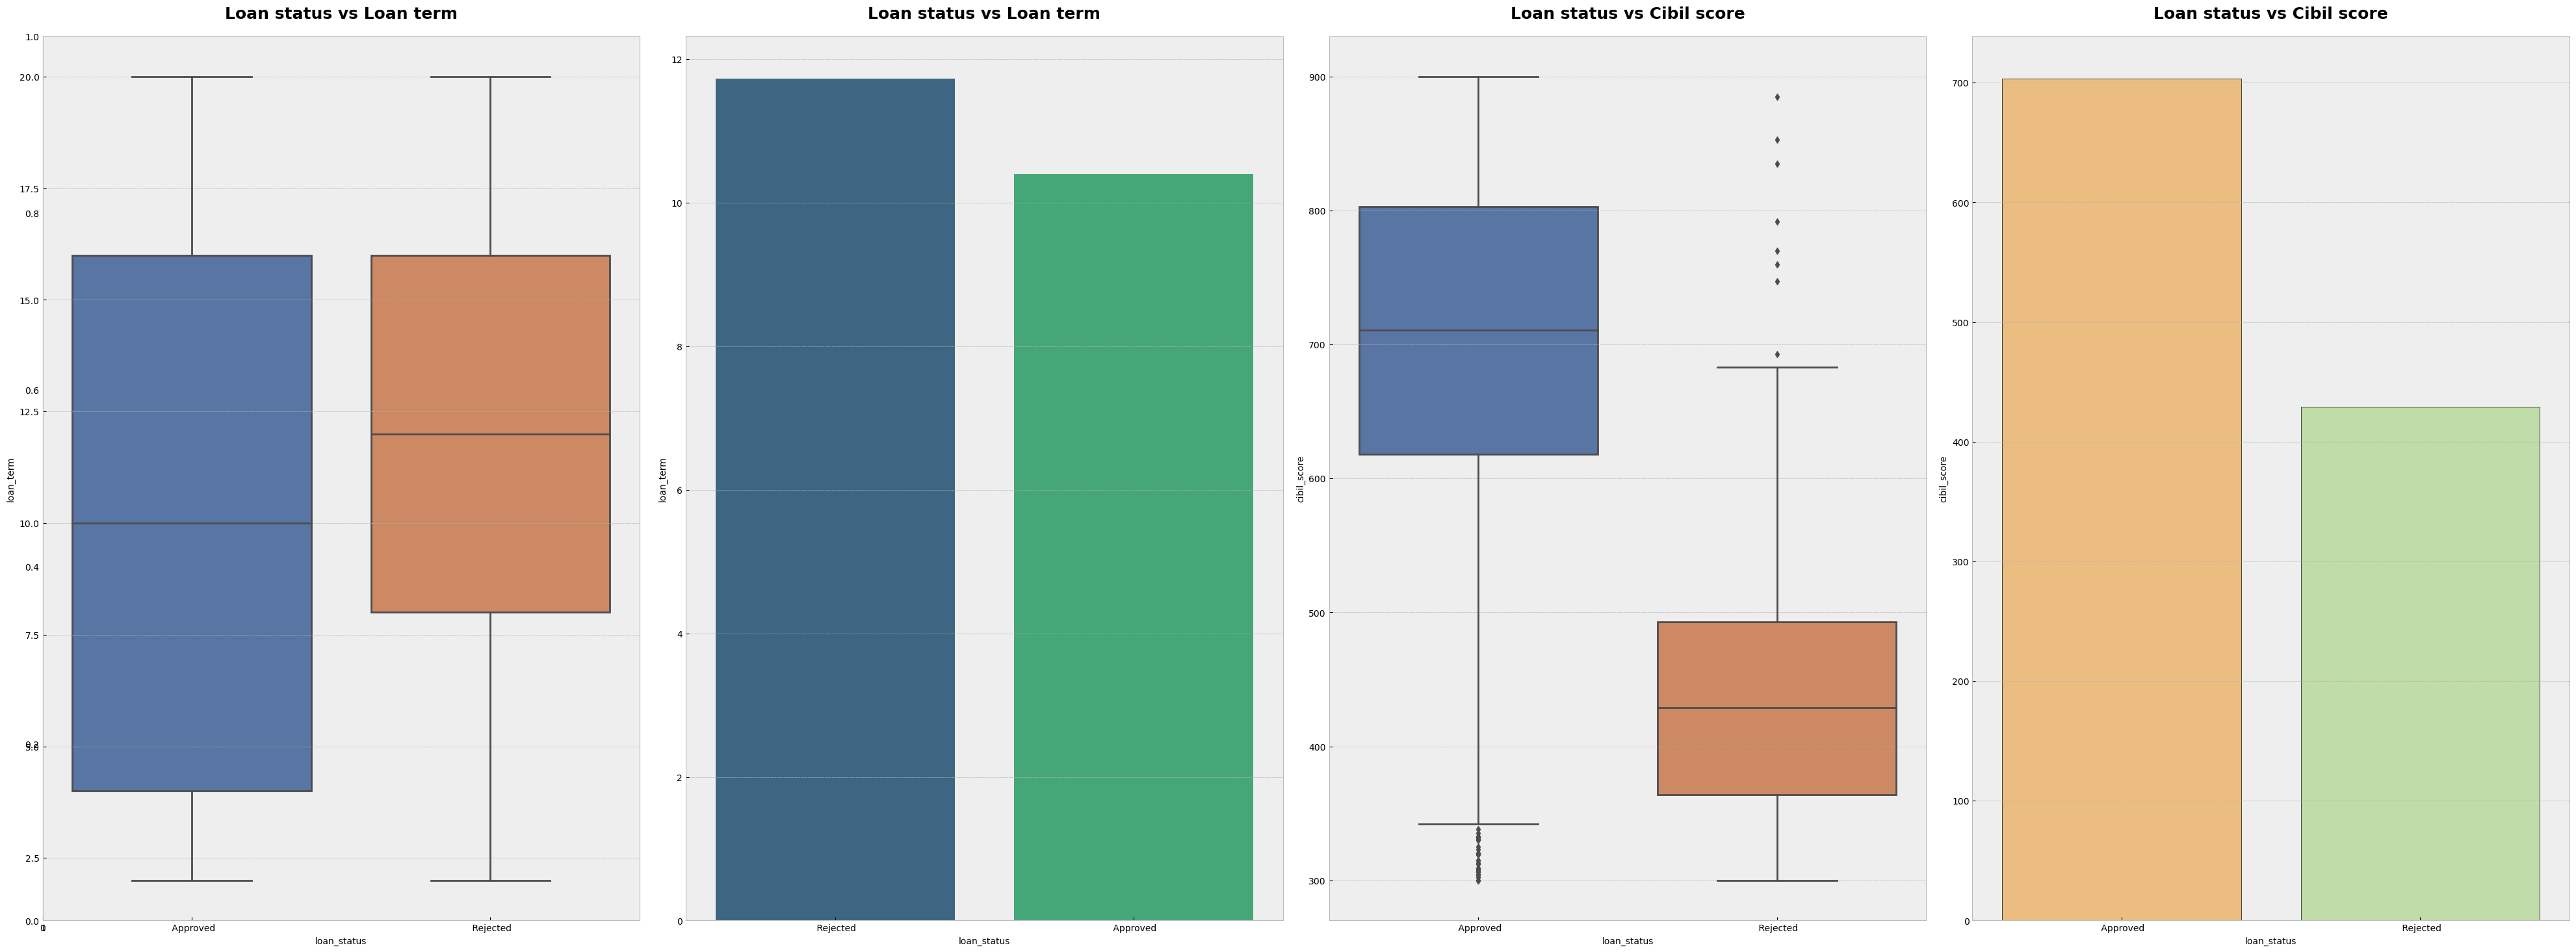

In [18]:
def categorical_visualization(cols):
    
    
    
    plt.subplots (1, 2, gridspec_kw={'width_ratios': [0, 10]}, figsize=(40, 15))
    plt.subplot(1,4,1)
    sns.boxplot(x=cols,y="loan_term",data=df,palette="deep")
    plt.title(f"{cols.replace('_', ' ').capitalize()} vs Loan term",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=0)
    
    plt.subplot(1,4,2)
    x=pd.DataFrame(df.groupby(cols)["loan_term"].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="loan_term",data=x,palette="viridis")
    plt.title(f"{cols.replace('_', ' ').capitalize()} vs Loan term",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=0)
    plt.tight_layout()
    
   
    plt.subplot(1,4,3)
    sns.boxplot(x=cols,y="cibil_score",data=df,palette="deep")
    plt.title(f"{cols.replace('_', ' ').capitalize()} vs Cibil score",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=0)

    
    
    plt.subplot(1,4,4)
    x=pd.DataFrame(df.groupby(cols)["cibil_score"].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="cibil_score",data=x,palette = 'Spectral', 
                ci = False,
                edgecolor = "black")
    plt.title(f"{cols.replace('_', ' ').capitalize()} vs Cibil score",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
categorical_visualization("loan_status")

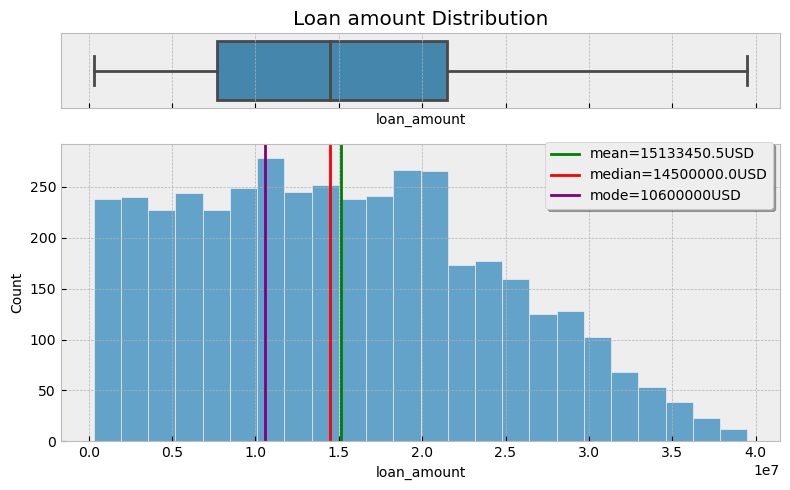

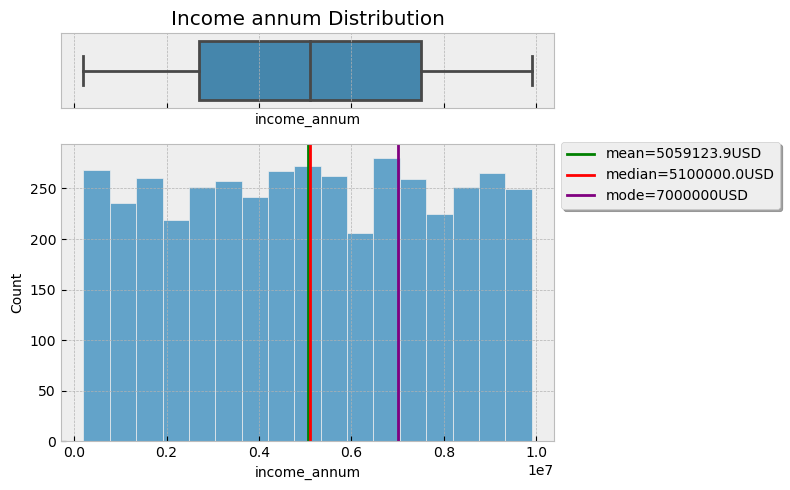

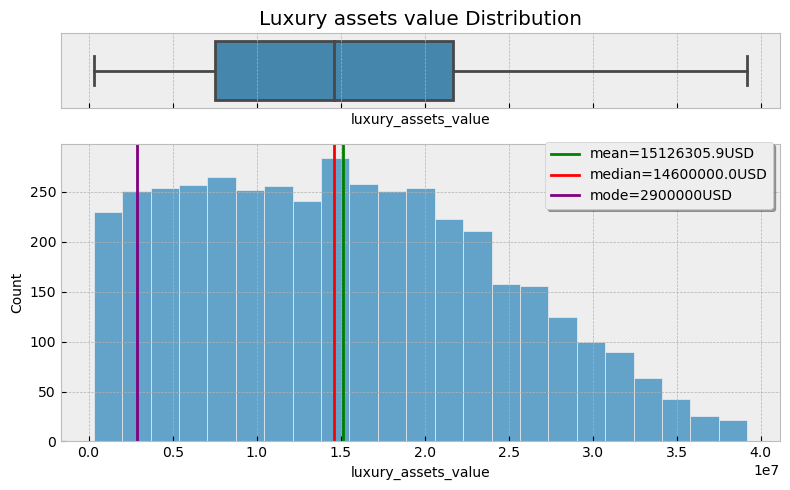

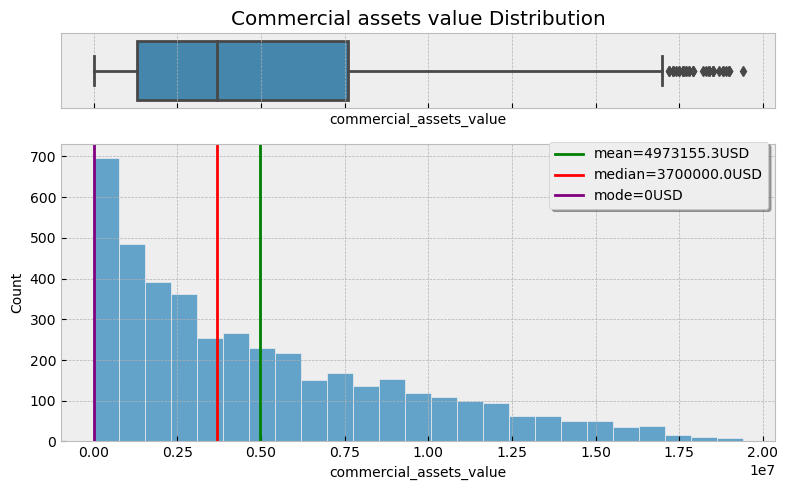

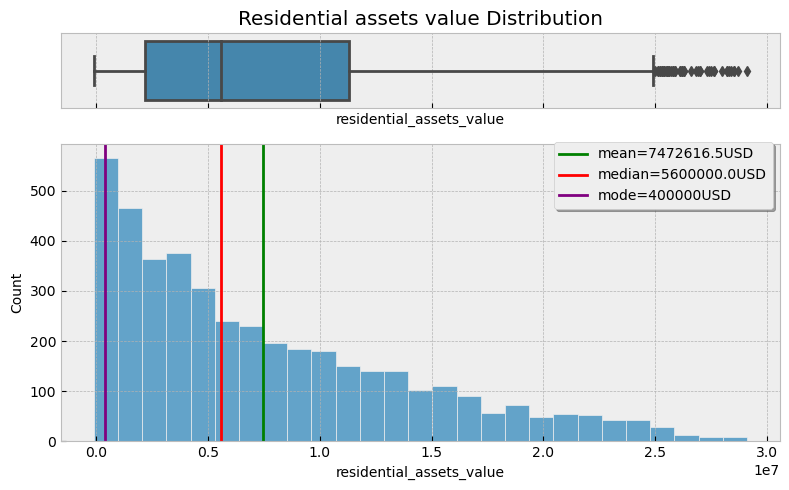

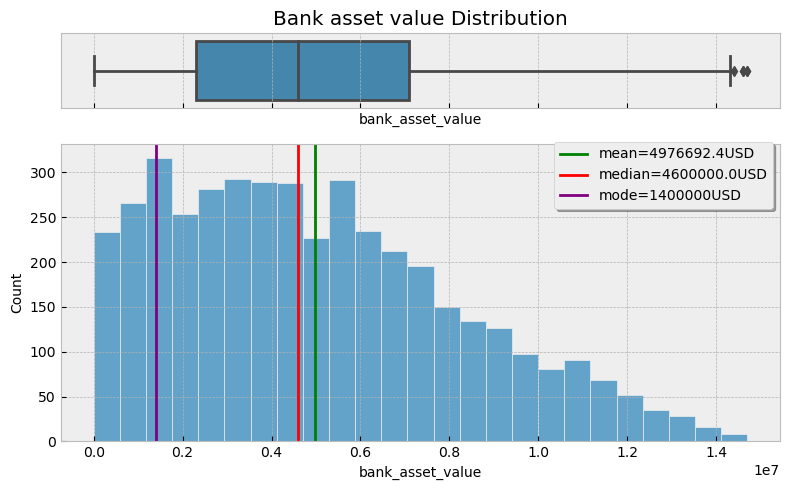

In [19]:
def num_plot(df, col, title, symb):
    #plt.subplots (6, 1, gridspec_kw={'width_ratios': [0, 10]}, figsize=(40, 15))
    fig, ax = plt.subplots(2, 1, sharex = True, figsize = (8,5),gridspec_kw = {"height_ratios": (.2, .8)})
    ax[0].set_title(title)
    sns.boxplot(x = col, data = df, ax = ax[0])
    ax[0].set(yticks = [])
    sns.histplot(x = col, data = df, ax = ax[1])
    ax[1].set_xlabel(col)
    plt.axvline(df[col].mean(), color = 'g', label = 'mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color = 'red', label = 'median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color = 'purple', label = 'mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor = (1, 1.03), ncol = 1, fancybox = True, shadow = True, frameon = True)
    plt.tight_layout()
    plt.show()
    
    
cols=["loan_amount","income_annum","luxury_assets_value",
       "commercial_assets_value","residential_assets_value",
       'bank_asset_value']
for col in cols:
    num_plot(df, col, f"{col.replace('_', ' ').capitalize()} Distribution",'USD')
        
        

# MODEL TRANNING

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import*
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [21]:
df.head()

loan_id  no_of_dependents      education self_employed  income_annum  \
0        1                 2       Graduate            No       9600000   
1        2                 0   Not Graduate           Yes       4100000   
2        3                 3       Graduate            No       9100000   
3        4                 3       Graduate            No       8200000   
4        5                 5   Not Graduate           Yes       9800000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   
2     29700000         20          506                   7100000   
3     30700000          8          467                  18200000   
4     24200000         20          382                  12400000   

   commercial_assets_value  luxury_assets_value  bank_asset_value loan_status  
0                 17600000             22700000           8000000    Approved  
1                  2200000              8800000           3300000    Rejected  
2                  4500000             33300000          12800000    Rejected  
3                  3300000             23300000           7900000    Rejected  
4                  8200000             29400000           5000000    Rejected

In [22]:
df1=df.copy()
df["loan_status"] = df["loan_status"].replace({
    " Approved": 1,
    " Rejected": 0
})
df.head()

loan_id  no_of_dependents      education self_employed  income_annum  \
0        1                 2       Graduate            No       9600000   
1        2                 0   Not Graduate           Yes       4100000   
2        3                 3       Graduate            No       9100000   
3        4                 3       Graduate            No       8200000   
4        5                 5   Not Graduate           Yes       9800000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   
2     29700000         20          506                   7100000   
3     30700000          8          467                  18200000   
4     24200000         20          382                  12400000   

   commercial_assets_value  luxury_assets_value  bank_asset_value  loan_status  
0                 17600000             22700000           8000000            1  
1                  2200000              8800000           3300000            0  
2                  4500000             33300000          12800000            0  
3                  3300000             23300000           7900000            0  
4                  8200000             29400000           5000000            0

In [23]:
scaler=StandardScaler()
label=LabelEncoder()
nul_col=['education','self_employed']
pd.get_dummies(df,nul_col,drop_first=True)
for cols in nul_col:
    df[cols]=label.fit_transform(df[col])
df.head()

x=df.drop(["loan_status",'loan_id'],axis=1)
y=df["loan_status"]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,test_size=0.8)
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [24]:
logistic=LogisticRegression()
tree=DecisionTreeClassifier()
forest=RandomForestClassifier(n_estimators=40)
ada=AdaBoostClassifier()
xgb=XGBClassifier()
#grid_search=GridSearchCV()
clf=MultinomialNB()
svm=SVC(kernel='linear', probability=True)
scaler=StandardScaler()
gus = GaussianNB()
ben = BernoulliNB(alpha=0.1,binarize=0.1)


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    # Add other hyperparameters to tune
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svm,
                           param_grid=param_grid,
                           cv=3)



In [25]:
def get_score(model):
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    accuracy=model.score(x_train,y_train)
    return accuracy*100

print("These are the accuracy scores for the Training  data as well \n")
print(f' For Logistic Regression Algorithm, we had an accuracy of {get_score(logistic)}')
print(f' For  Decision Tree Algorithm, we had an accuracy of {get_score(tree)}')
print(f' For Random Forest Algorithm, we had an accuracy of {get_score(forest)}')
print(f' For xgboost Algorithm, we had an accuracy of {get_score(xgb)}')
print(f' For AdaBoostClassifier Algorithm, we had an accuracy of {get_score(ada)}')
print(f' For SVM Algorithm, we had an accuracy of {get_score(svm)}')
print(f' For Gaussian Algorithm, we had an accuracy of {get_score(gus)}')
print(f' For Bernoulli Algorithm, we had an accuracy of {get_score(ben)}')
#print(f' For Naive Bayes Algorithm, we had an accuracy of {clf.score(x_test1,y_test1)}')

These are the accuracy scores for the Training  data as well 

 For Logistic Regression Algorithm, we had an accuracy of 92.4970691676436
 For  Decision Tree Algorithm, we had an accuracy of 100.0
 For Random Forest Algorithm, we had an accuracy of 100.0
 For xgboost Algorithm, we had an accuracy of 100.0
 For AdaBoostClassifier Algorithm, we had an accuracy of 99.53106682297772
 For SVM Algorithm, we had an accuracy of 92.73153575615474
 For Gaussian Algorithm, we had an accuracy of 93.31770222743259
 For Bernoulli Algorithm, we had an accuracy of 86.1664712778429


In [26]:
def get_score(model):
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    accuracy=model.score(x_test,y_test)
    return accuracy*100

print("These are the accuracy scores for the Testing data  \n")
print(f' For Logistic Regression Algorithm, we had an accuracy of {get_score(logistic)}')
print(f' For  Decision Tree Algorithm, we had an accuracy of {get_score(tree)}')
print(f' For Random Forest Algorithm, we had an accuracy of {get_score(forest)}')
print(f' For xgboost Algorithm, we had an accuracy of {get_score(xgb)}')
print(f' For AdaBoostClassifier Algorithm, we had an accuracy of {get_score(ada)}')
print(f' For SVM Algorithm, we had an accuracy of {get_score(svm)}')
#print(f' For Grid search Algorithm, we had an accuracy of {get_score(grid_search)}')
print(f' For  GaussianN Algorithm, we had an accuracy of {get_score(gus)}')
print(f' For Bernoulli Algorithm, we had an accuracy of {get_score(ben)}')
#print(f' For Naive Bayes Algorithm, we had an accuracy of {clf.score(x_test1,y_test1)}')

These are the accuracy scores for the Testing data  

 For Logistic Regression Algorithm, we had an accuracy of 90.9543325526932
 For  Decision Tree Algorithm, we had an accuracy of 96.8384074941452
 For Random Forest Algorithm, we had an accuracy of 96.60421545667447
 For xgboost Algorithm, we had an accuracy of 96.77985948477752
 For AdaBoostClassifier Algorithm, we had an accuracy of 97.18969555035129
 For SVM Algorithm, we had an accuracy of 91.53981264637002
 For  GaussianN Algorithm, we had an accuracy of 93.00351288056206
 For Bernoulli Algorithm, we had an accuracy of 84.74824355971897


In [27]:
algorithms = [logistic, tree, forest, ada, xgb,gus,ben]
algorithm_names = ["Logistic Regression", "Decision Tree",
                   "Random Forest", "AdaBoostClassifier","xbg",
                   "Gaussian","Bernoulli"]

# Loop through the algorithms and calculate and print accuracies
for col, col_name in zip(algorithms, algorithm_names):
    accuracies = cross_val_score(col, x, y)
    print(f'The Mean accuracy  for {col_name} is: {accuracies.mean()*100}')

The Mean accuracy  for Logistic Regression is: 62.23940301621773
The Mean accuracy  for Decision Tree is: 97.6575305232119
The Mean accuracy  for Random Forest is: 97.8450214287087
The Mean accuracy  for AdaBoostClassifier is: 96.90797872778538
The Mean accuracy  for xbg is: 98.38374548020349
The Mean accuracy  for Gaussian is: 76.03649881531226
The Mean accuracy  for Bernoulli is: 62.14572620122944


Text(0.5, 1.0, 'Confusion Matrix for Support Vector Machine')

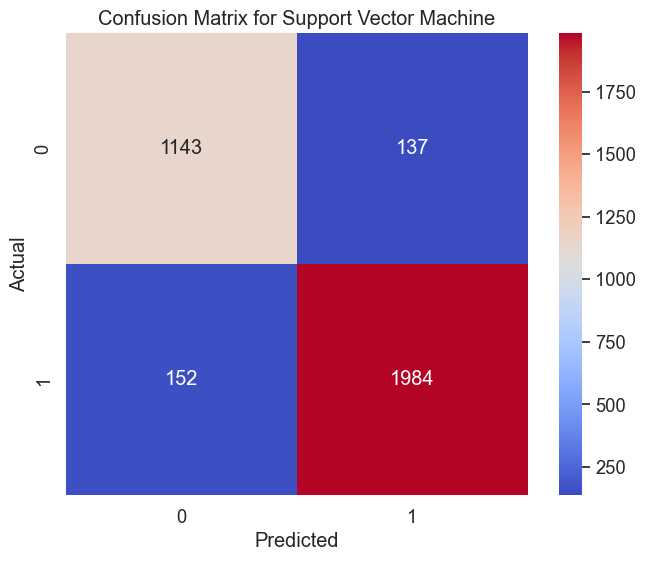

In [28]:
svm.fit(x_train,y_train)
pred=svm.predict(x_test)
con=confusion_matrix(y_test,pred)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(con, annot=True, fmt="d", cmap="coolwarm", cbar=True, square=True)

# Add labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Support Vector Machine")

Text(0.5, 1.0, 'Confusion Matrix For Decision Tree')

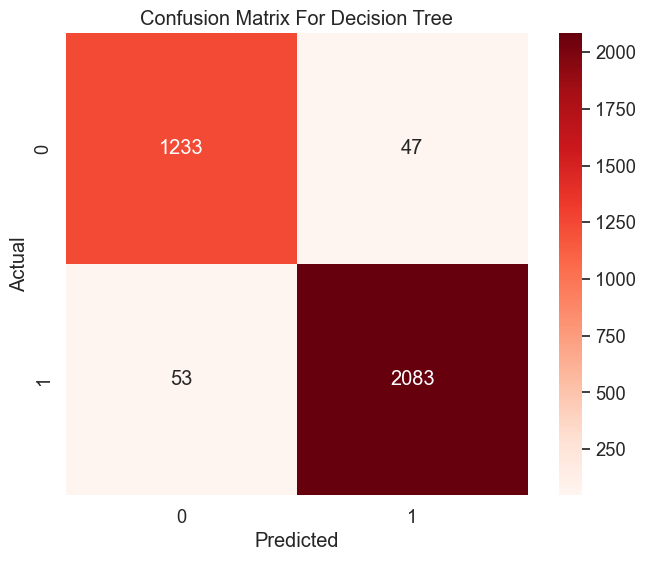

In [29]:
tree.fit(x_train,y_train)
pred=tree.predict(x_test)
con=confusion_matrix(y_test,pred)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(con, annot=True, fmt="d", cmap="Reds", cbar=True, square=True)

# Add labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix For Decision Tree")

Text(0.5, 1.0, 'Confusion Matrix For Random Forest')

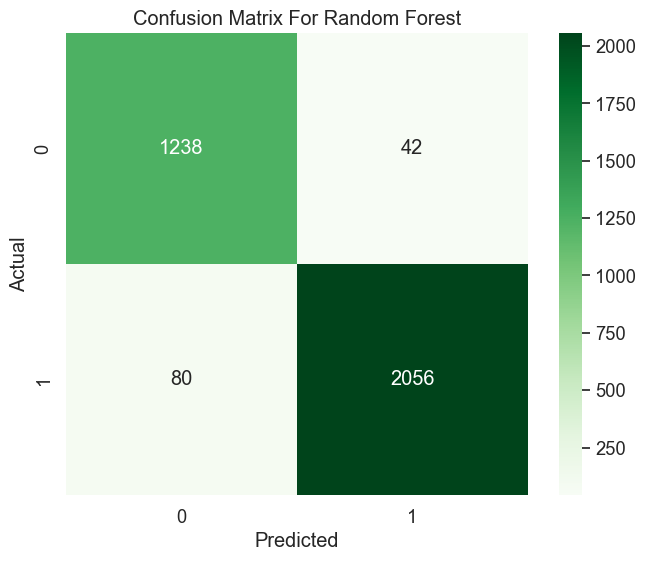

In [30]:
forest.fit(x_train,y_train)
pred=forest.predict(x_test)
con=confusion_matrix(y_test,pred)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(con, annot=True, fmt="d", cmap="Greens", cbar=True, square=True)

# Add labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix For Random Forest")

Text(0.5, 1.0, 'Confusion Matrix for Support Vector Machine')

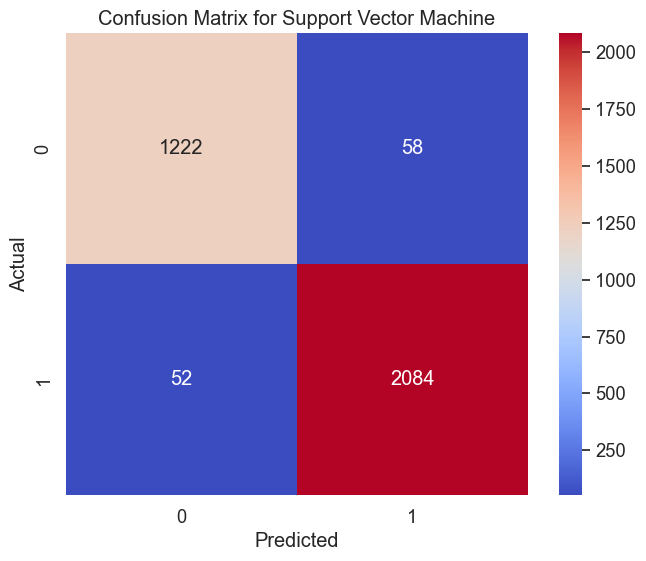

In [31]:
xgb.fit(x_train,y_train)
pred=xgb.predict(x_test)
con=confusion_matrix(y_test,pred)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(con, annot=True, fmt="d", cmap="coolwarm", cbar=True, square=True)

# Add labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Support Vector Machine")

Decision tree,SVM and Random Forest gave us the best model to use

FOR TRAINING SET

These are the accuracy scores for the Testing data  

 For Logistic Regression Algorithm, we had an accuracy of 92.26939970717423
 For  Decision Tree Algorithm, we had an accuracy of 100.0
 For Random Forest Algorithm, we had an accuracy of 100.0
 For xgboost Algorithm, we had an accuracy of 100.0
 For AdaBoostClassifier Algorithm, we had an accuracy of 97.83308931185944


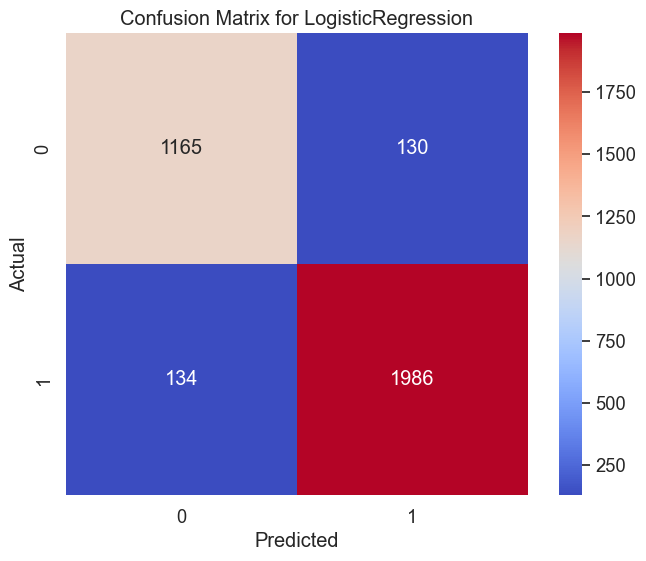

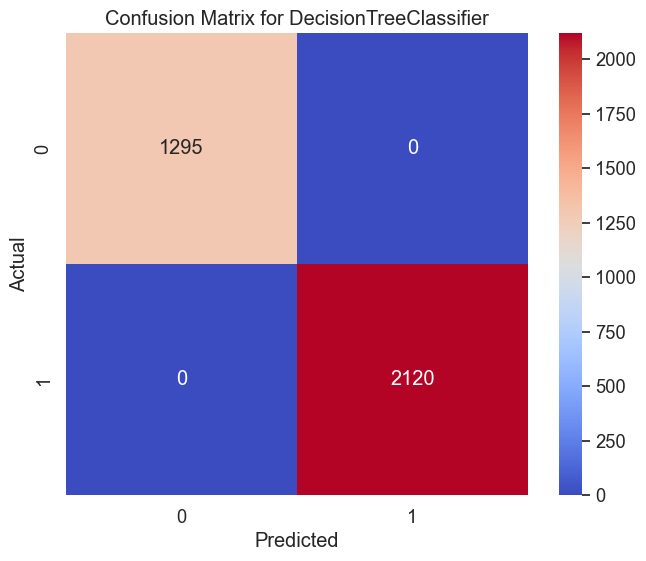

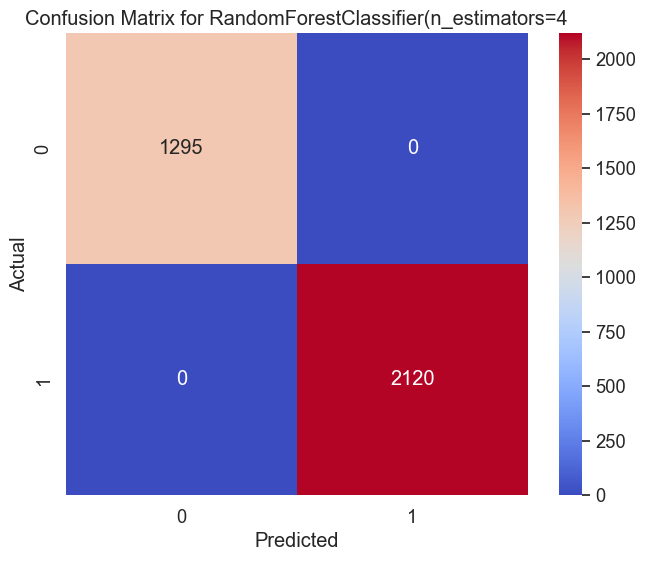

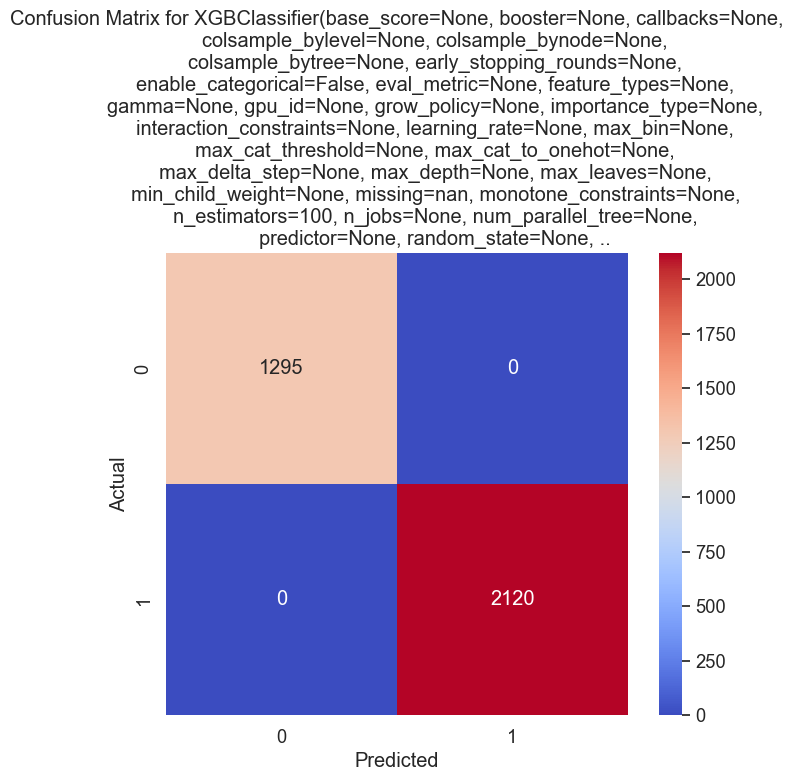

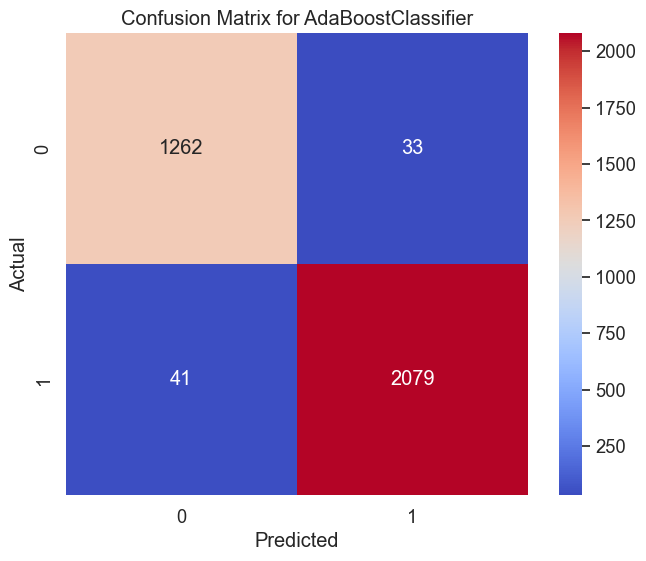

In [32]:
from sklearn.feature_selection import RFE    

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(x, y, test_size=0.2, random_state=42)

def get_score(model):
    rfe = RFE(estimator=model, n_features_to_select=8, step=1)
    rfe = rfe.fit(X_train2, Y_train2)
    selected_features2 = x.columns[rfe.support_]
    X_train_scaled2 = scaler.fit_transform(X_train2[selected_features2])
    X_test_scaled2 = scaler.transform(X_test2[selected_features2])


      

    model.fit(X_train_scaled2,Y_train2)
    pred=model.predict(X_train_scaled2)
    score=model.score(X_train_scaled2,Y_train2)
    
    
    con=confusion_matrix(Y_train2,pred)
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(con, annot=True, fmt="d", cmap="coolwarm", cbar=True, square=True)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    
    
    plt.title(f'Confusion Matrix for {str(model)[0:-2]}')
    return score*100

print("These are the accuracy scores for the Testing data  \n")
print(f' For Logistic Regression Algorithm, we had an accuracy of {get_score(logistic)}')
print(f' For  Decision Tree Algorithm, we had an accuracy of {get_score(tree)}')
print(f' For Random Forest Algorithm, we had an accuracy of {get_score(forest)}')
print(f' For xgboost Algorithm, we had an accuracy of {get_score(xgb)}')
print(f' For AdaBoostClassifier Algorithm, we had an accuracy of {get_score(ada)}')





FOR TESTING SET

These are the accuracy scores for the Testing data  

 For Logistic Regression Algorithm, we had an accuracy of 92.62295081967213
 For  Decision Tree Algorithm, we had an accuracy of 97.30679156908664
 For Random Forest Algorithm, we had an accuracy of 97.42388758782201
 For xgboost Algorithm, we had an accuracy of 98.59484777517564
 For AdaBoostClassifier Algorithm, we had an accuracy of 96.95550351288055


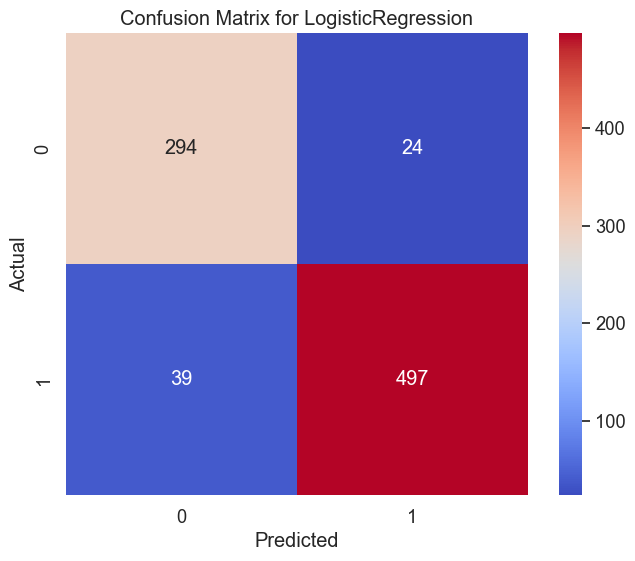

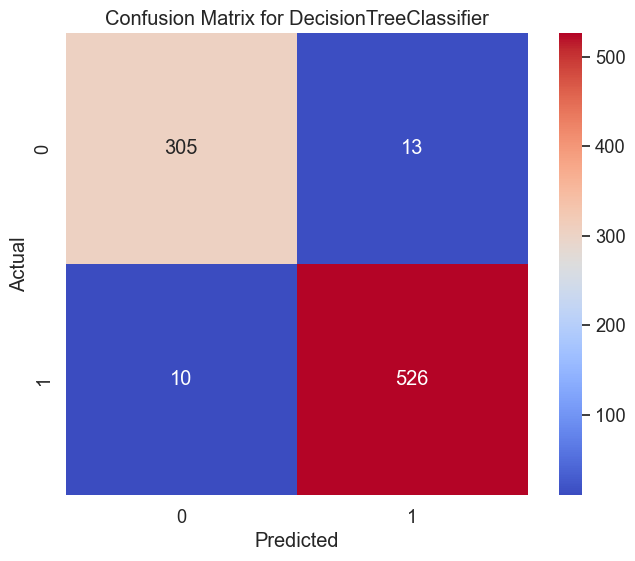

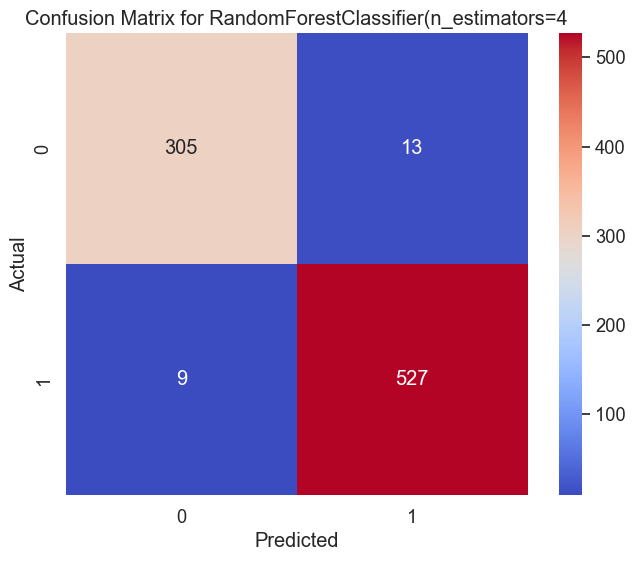

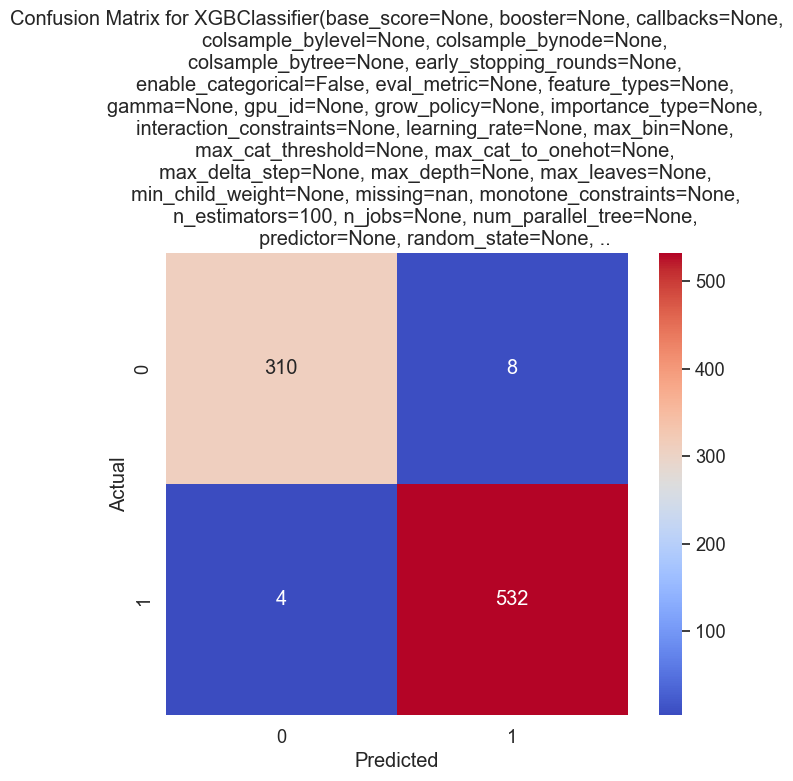

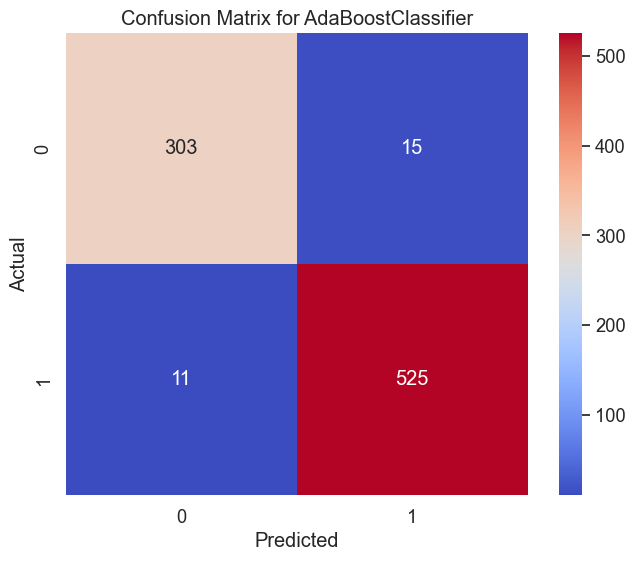

In [33]:
from sklearn.feature_selection import RFE    

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(x, y, test_size=0.2, random_state=42)

def get_score(model):
    rfe = RFE(estimator=model, n_features_to_select=8, step=1)
    rfe = rfe.fit(X_train2, Y_train2)
    selected_features2 = x.columns[rfe.support_]
    X_train_scaled2 = scaler.fit_transform(X_train2[selected_features2])
    X_test_scaled2 = scaler.transform(X_test2[selected_features2])


      

    model.fit(X_train_scaled2,Y_train2)
    pred=model.predict(X_test_scaled2)
    score=model.score(X_test_scaled2,Y_test2)
    global report
    report= classification_report(Y_test2,pred)
 
    
    con=confusion_matrix(Y_test2,pred)
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(con, annot=True, fmt="d", cmap="coolwarm", cbar=True, square=True)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    
    
    plt.title(f'Confusion Matrix for {str(model)[0:-2]}')
    return score*100

print("These are the accuracy scores for the Testing data  \n")
print(f' For Logistic Regression Algorithm, we had an accuracy of {get_score(logistic)}')
print(f' For  Decision Tree Algorithm, we had an accuracy of {get_score(tree)}')
print(f' For Random Forest Algorithm, we had an accuracy of {get_score(forest)}')
print(f' For xgboost Algorithm, we had an accuracy of {get_score(xgb)}')
print(f' For AdaBoostClassifier Algorithm, we had an accuracy of {get_score(ada)}')





FOR TESTING SET

XBGOOST, DECISION TREE ADABOOST AND RANDOM FOREST GAVE US THE BEST MODEL

BUT xgboost Algorithm is giving us the best model to use , so let's find the classification report for it